In [ ]:
# default_exp gbe.wm.reliability

# Working memory task - Reliability

<div>
    <p align="left"><img src="images/wm_task.png" width = '200px'> 

    
   
    
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from trr265 import plotting
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.wm.data_provider import WMDataProvider
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)

8 participants used an old version of the task in some of their sessions.  13 sessions (2.47%) were removed from the dataset.
6 sessions (1.17%) were removed because participants failed a level two trial.


## Test-retest reliability

### Based on maximum WMC level

#### No distractor (long)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.276,1.761,235.0,236.0,0.0,0.174,0.372,".28 (.17, .37)"
Single_random_raters,ICC2,0.276,1.761,235.0,235.0,0.0,0.174,0.372,".28 (.17, .37)"
Single_fixed_raters,ICC3,0.276,1.761,235.0,235.0,0.0,0.174,0.372,".28 (.17, .37)"
Average_raters_absolute,ICC1k,0.432,1.761,235.0,236.0,0.0,0.296,0.542,".43 (.30, .54)"
Average_random_raters,ICC2k,0.432,1.761,235.0,235.0,0.0,0.296,0.542,".43 (.30, .54)"
Average_fixed_raters,ICC3k,0.432,1.761,235.0,235.0,0.0,0.296,0.542,".43 (.30, .54)"


,variance,Percent
ID,0.301,0.276
Items,0.000,0.000
Residual,0.790,0.724
Total,1.091,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


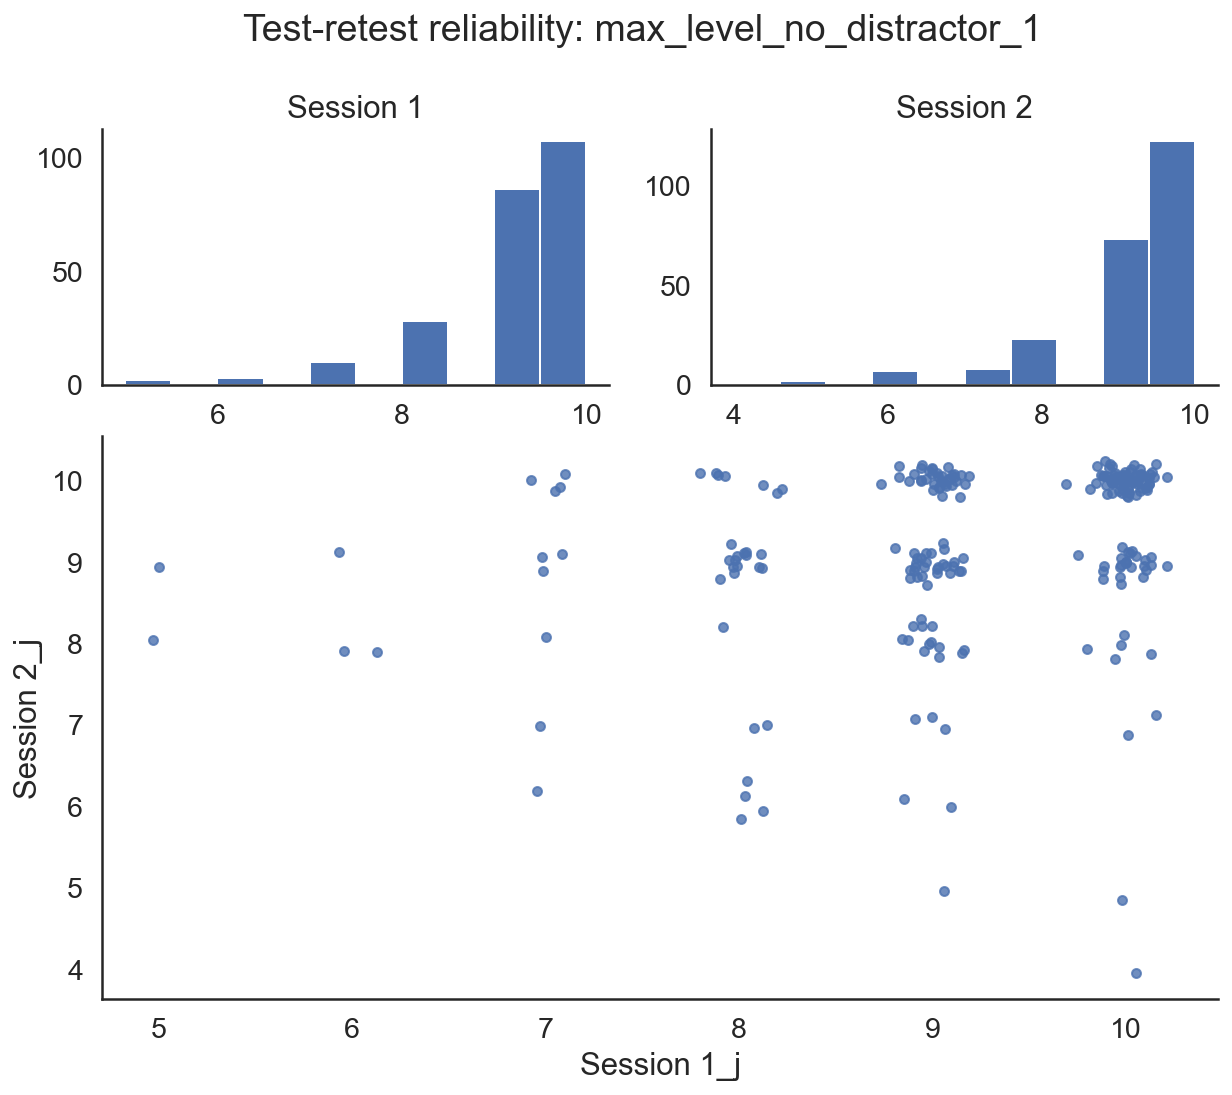

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_1', add_jitter = True)

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.445,2.603,235.0,236.0,0.0,0.355,0.527,".44 (.35, .53)"
Single_random_raters,ICC2,0.445,2.603,235.0,235.0,0.0,0.355,0.527,".44 (.35, .53)"
Single_fixed_raters,ICC3,0.445,2.603,235.0,235.0,0.0,0.355,0.527,".44 (.35, .53)"
Average_raters_absolute,ICC1k,0.616,2.603,235.0,236.0,0.0,0.524,0.690,".62 (.52, .69)"
Average_random_raters,ICC2k,0.616,2.603,235.0,235.0,0.0,0.524,0.690,".62 (.52, .69)"
Average_fixed_raters,ICC3k,0.616,2.603,235.0,235.0,0.0,0.524,0.690,".62 (.52, .69)"


,variance,Percent
ID,0.609,0.445
Items,0.000,0.000
Residual,0.761,0.555
Total,1.370,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


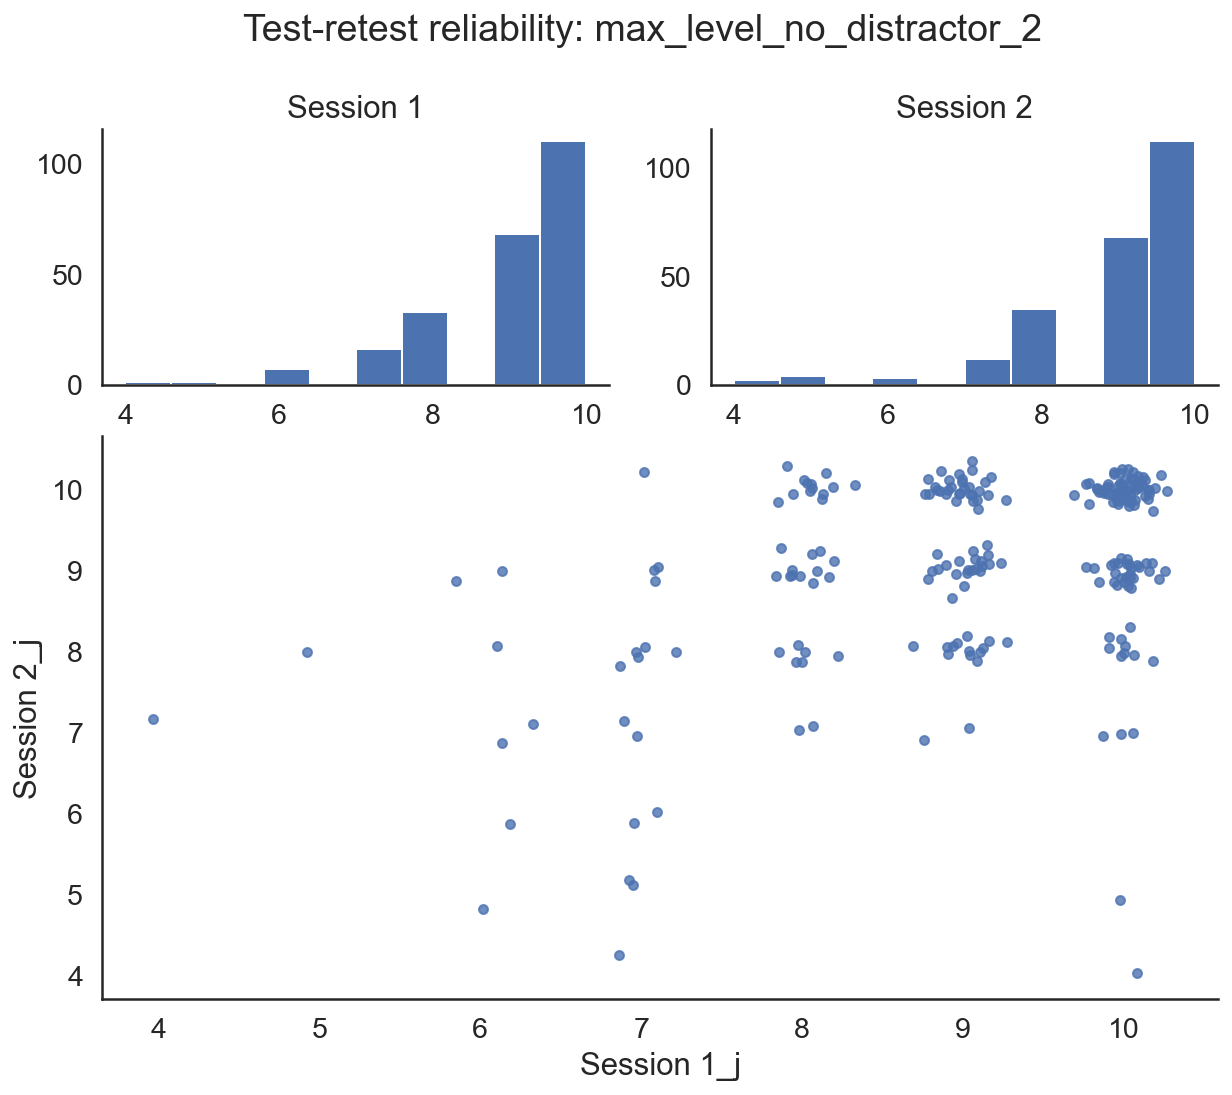

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.377,2.209,235.0,236.0,0.0,0.281,0.465,".38 (.28, .47)"
Single_random_raters,ICC2,0.379,2.238,235.0,235.0,0.0,0.284,0.467,".38 (.28, .47)"
Single_fixed_raters,ICC3,0.382,2.238,235.0,235.0,0.0,0.287,0.470,".38 (.29, .47)"
Average_raters_absolute,ICC1k,0.547,2.209,235.0,236.0,0.0,0.439,0.635,".55 (.44, .63)"
Average_random_raters,ICC2k,0.550,2.238,235.0,235.0,0.0,0.443,0.637,".55 (.44, .64)"
Average_fixed_raters,ICC3k,0.553,2.238,235.0,235.0,0.0,0.446,0.640,".55 (.45, .64)"


,variance,Percent
ID,0.562,0.379
Items,0.012,0.008
Residual,0.908,0.613
Total,1.481,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


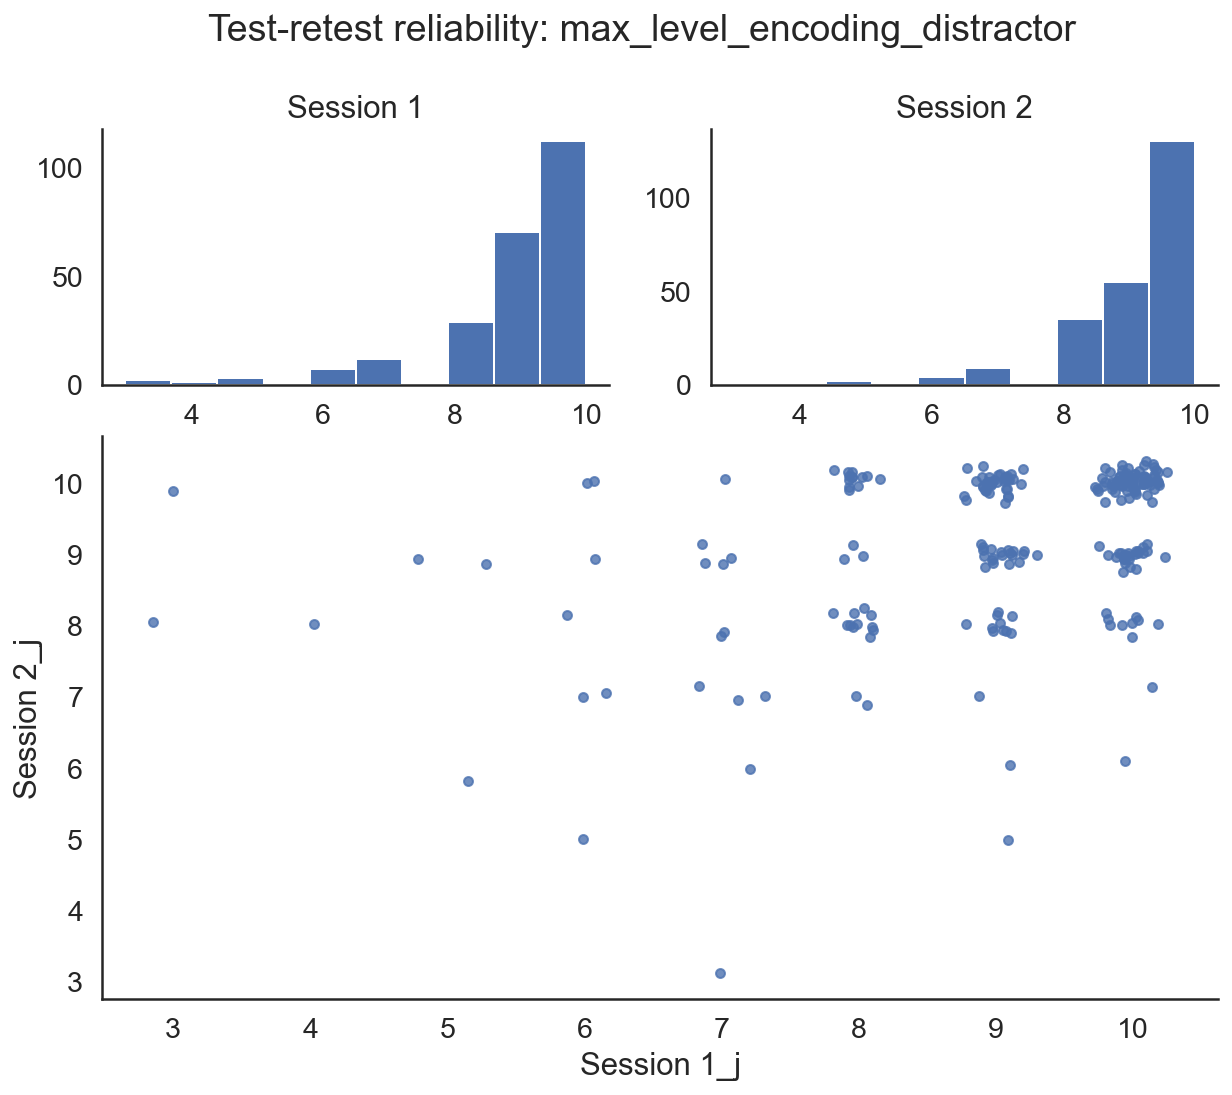

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_encoding_distractor = stats.analyze_reliability(_df, dependent = 'max_level_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.393,2.293,235.0,236.0,0.0,0.298,0.479,".39 (.30, .48)"
Single_random_raters,ICC2,0.400,2.391,235.0,235.0,0.0,0.305,0.487,".40 (.31, .49)"
Single_fixed_raters,ICC3,0.410,2.391,235.0,235.0,0.0,0.317,0.496,".41 (.32, .50)"
Average_raters_absolute,ICC1k,0.564,2.293,235.0,236.0,0.0,0.459,0.648,".56 (.46, .65)"
Average_random_raters,ICC2k,0.572,2.391,235.0,235.0,0.0,0.467,0.655,".57 (.47, .66)"
Average_fixed_raters,ICC3k,0.582,2.391,235.0,235.0,0.0,0.481,0.663,".58 (.48, .66)"


,variance,Percent
ID,0.763,0.400
Items,0.047,0.025
Residual,1.097,0.575
Total,1.907,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


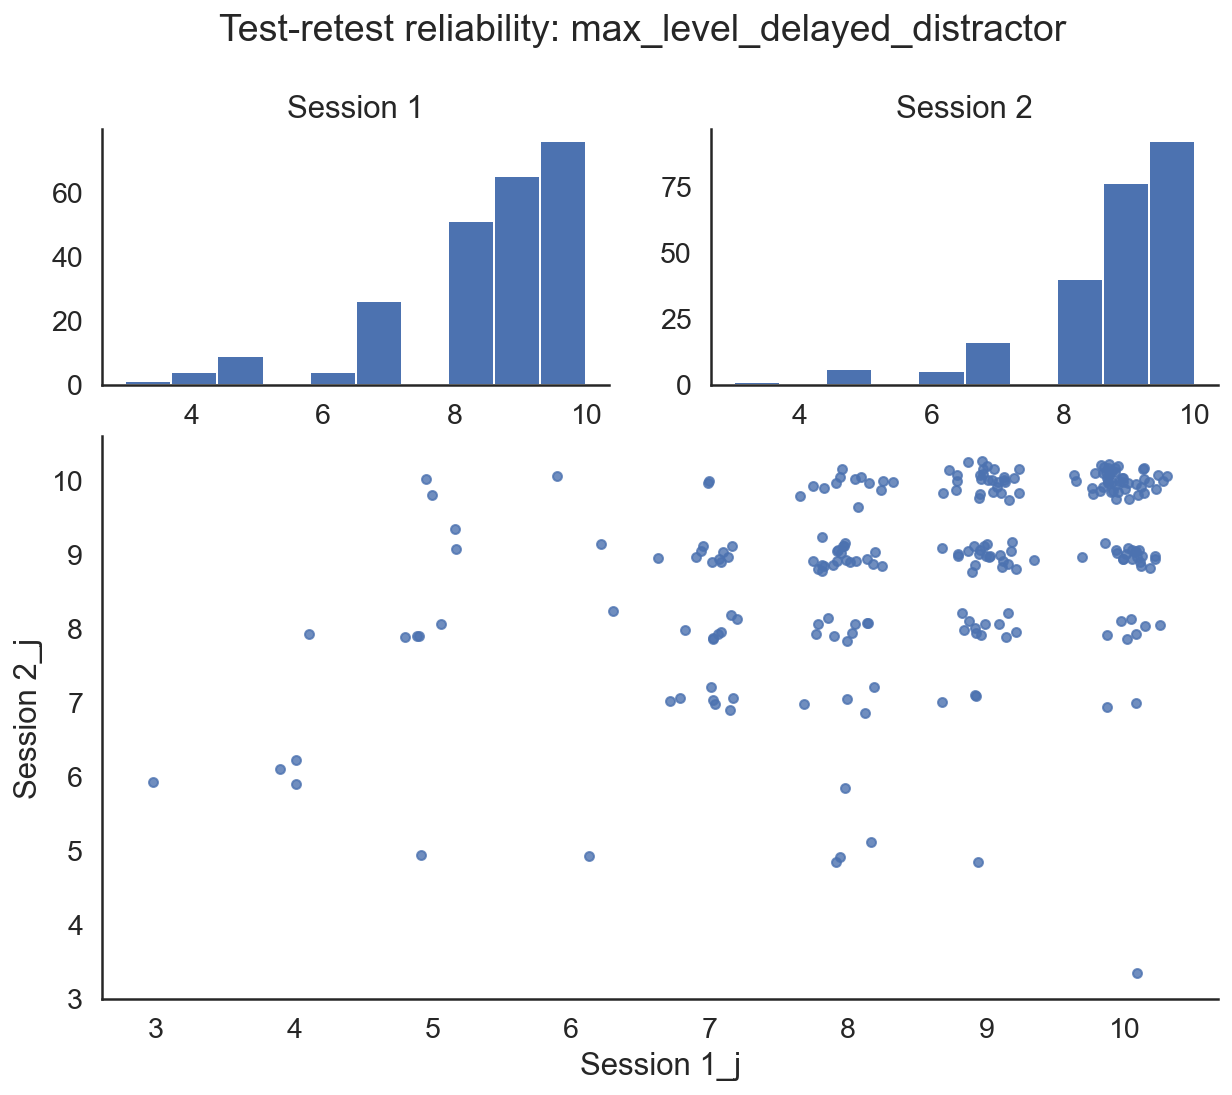

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_delayed_distractor = stats.analyze_reliability(_df, dependent = 'max_level_delayed_distractor', add_jitter = True)

### Based on predicted values (separate models)

#### No distractor (long)

In [ ]:
_df = wm_scoring.get_perc_correct_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.296,1.839,235.0,236.0,0.0,0.195,0.390,".30 (.19, .39)"
Single_random_raters,ICC2,0.296,1.839,235.0,235.0,0.0,0.195,0.390,".30 (.19, .39)"
Single_fixed_raters,ICC3,0.296,1.839,235.0,235.0,0.0,0.195,0.390,".30 (.19, .39)"
Average_raters_absolute,ICC1k,0.456,1.839,235.0,236.0,0.0,0.326,0.561,".46 (.33, .56)"
Average_random_raters,ICC2k,0.456,1.839,235.0,235.0,0.0,0.326,0.561,".46 (.33, .56)"
Average_fixed_raters,ICC3k,0.456,1.839,235.0,235.0,0.0,0.326,0.562,".46 (.33, .56)"


,variance,Percent
ID,0.004,0.296
Items,0.000,0.000
Residual,0.011,0.704
Total,0.015,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


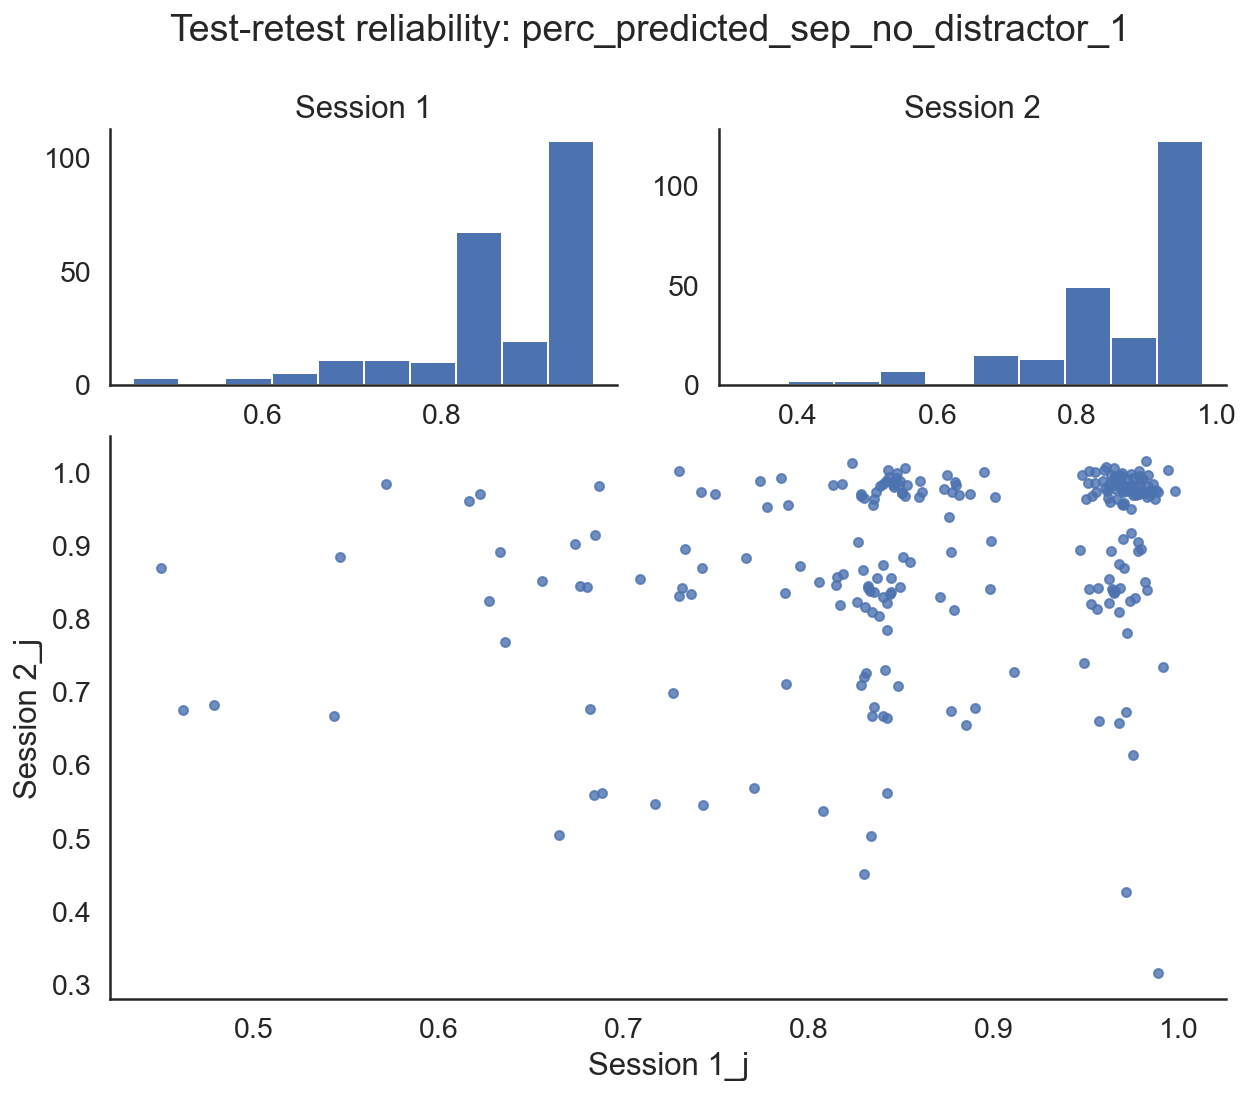

In [ ]:
iccs_perc_predicted_sep_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_1', add_jitter = True)

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.448,2.622,235.0,236.0,0.0,0.358,0.529,".45 (.36, .53)"
Single_random_raters,ICC2,0.448,2.622,235.0,235.0,0.0,0.358,0.529,".45 (.36, .53)"
Single_fixed_raters,ICC3,0.448,2.622,235.0,235.0,0.0,0.358,0.529,".45 (.36, .53)"
Average_raters_absolute,ICC1k,0.619,2.622,235.0,236.0,0.0,0.527,0.692,".62 (.53, .69)"
Average_random_raters,ICC2k,0.619,2.622,235.0,235.0,0.0,0.527,0.692,".62 (.53, .69)"
Average_fixed_raters,ICC3k,0.619,2.622,235.0,235.0,0.0,0.527,0.692,".62 (.53, .69)"


,variance,Percent
ID,0.009,0.448
Items,0.000,0.000
Residual,0.011,0.552
Total,0.020,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


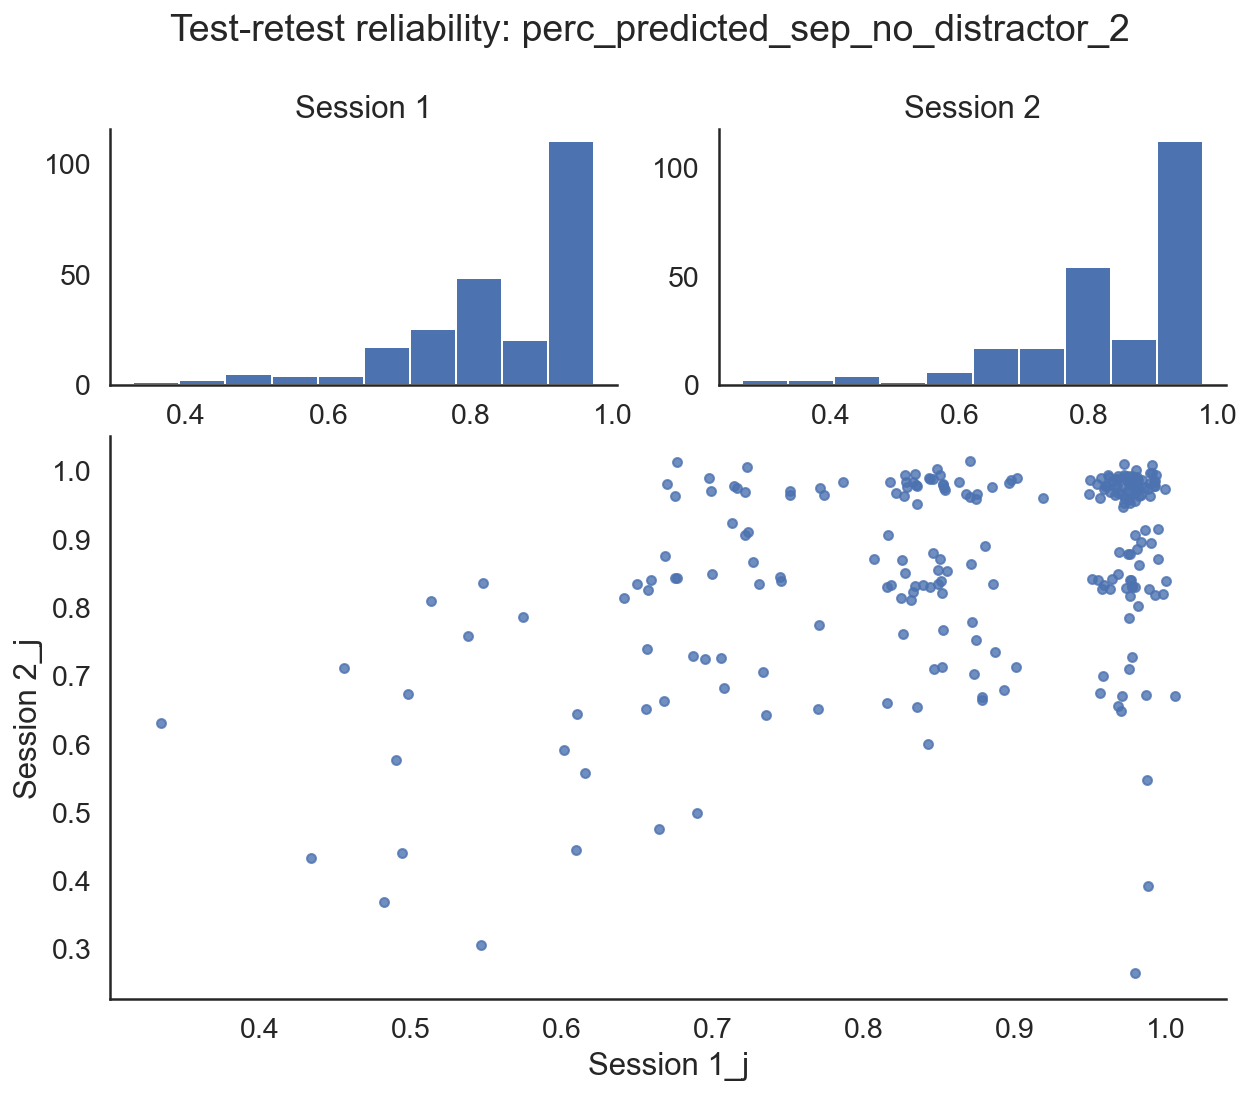

In [ ]:
iccs_perc_predicted_sep_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.383,2.241,235.0,236.0,0.0,0.288,0.471,".38 (.29, .47)"
Single_random_raters,ICC2,0.387,2.287,235.0,235.0,0.0,0.292,0.474,".39 (.29, .47)"
Single_fixed_raters,ICC3,0.391,2.287,235.0,235.0,0.0,0.297,0.479,".39 (.30, .48)"
Average_raters_absolute,ICC1k,0.554,2.241,235.0,236.0,0.0,0.447,0.640,".55 (.45, .64)"
Average_random_raters,ICC2k,0.558,2.287,235.0,235.0,0.0,0.452,0.643,".56 (.45, .64)"
Average_fixed_raters,ICC3k,0.563,2.287,235.0,235.0,0.0,0.458,0.647,".56 (.46, .65)"


,variance,Percent
ID,0.008,0.387
Items,0.000,0.012
Residual,0.013,0.601
Total,0.022,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


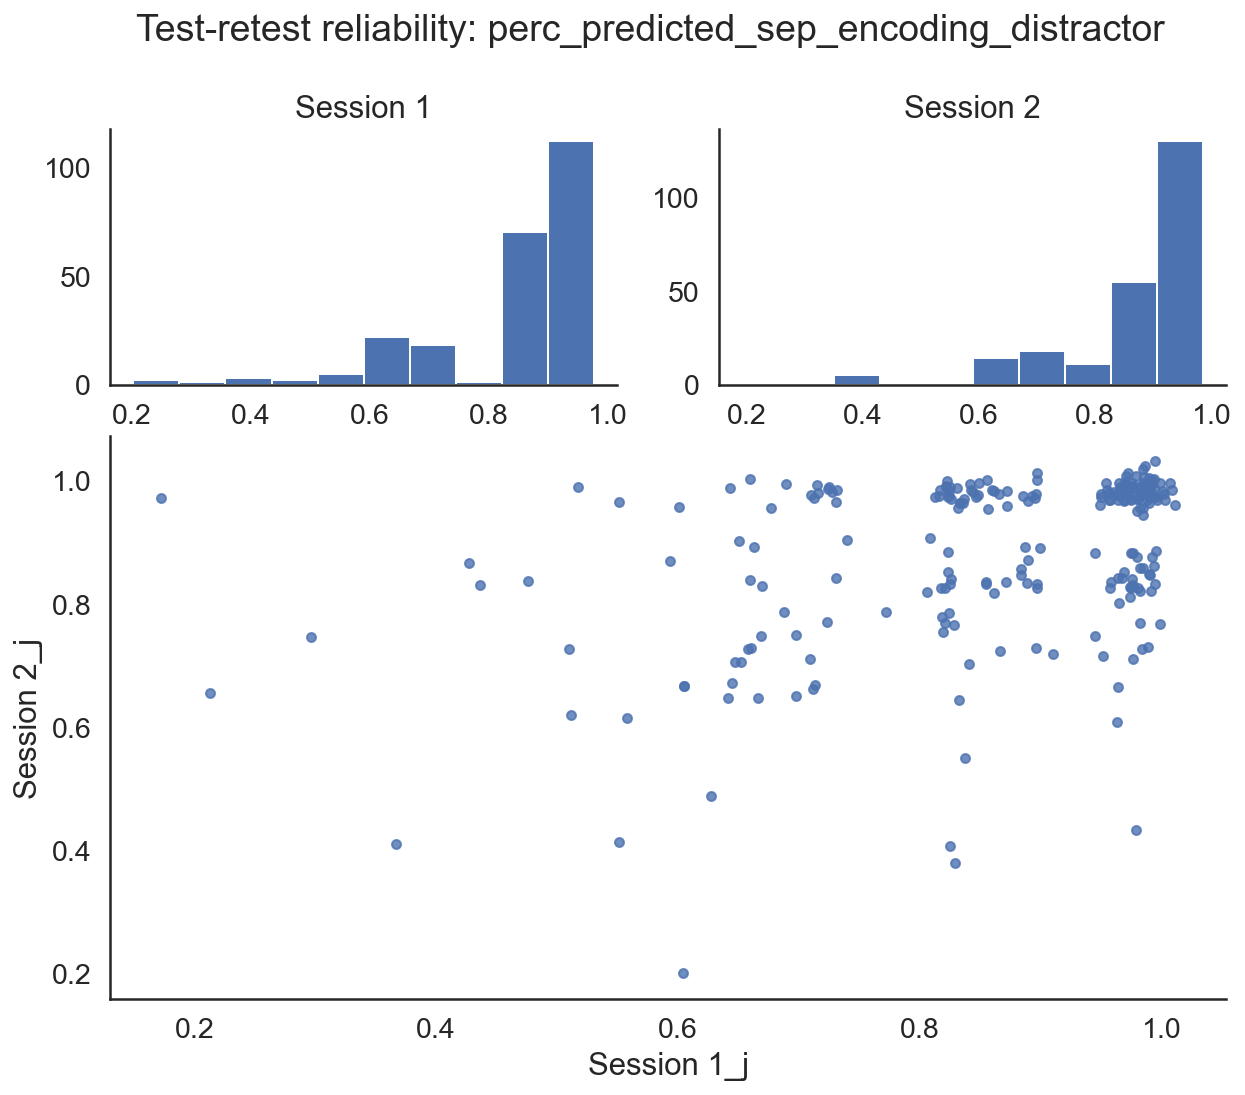

In [ ]:
perc_predicted_sep_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.417,2.430,235.0,236.0,0.0,0.324,0.501,".42 (.32, .50)"
Single_random_raters,ICC2,0.428,2.602,235.0,235.0,0.0,0.330,0.515,".43 (.33, .52)"
Single_fixed_raters,ICC3,0.445,2.602,235.0,235.0,0.0,0.355,0.527,".44 (.35, .53)"
Average_raters_absolute,ICC1k,0.588,2.430,235.0,236.0,0.0,0.490,0.668,".59 (.49, .67)"
Average_random_raters,ICC2k,0.599,2.602,235.0,235.0,0.0,0.496,0.680,".60 (.50, .68)"
Average_fixed_raters,ICC3k,0.616,2.602,235.0,235.0,0.0,0.524,0.690,".62 (.52, .69)"


,variance,Percent
ID,0.011,0.428
Items,0.001,0.038
Residual,0.014,0.534
Total,0.026,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


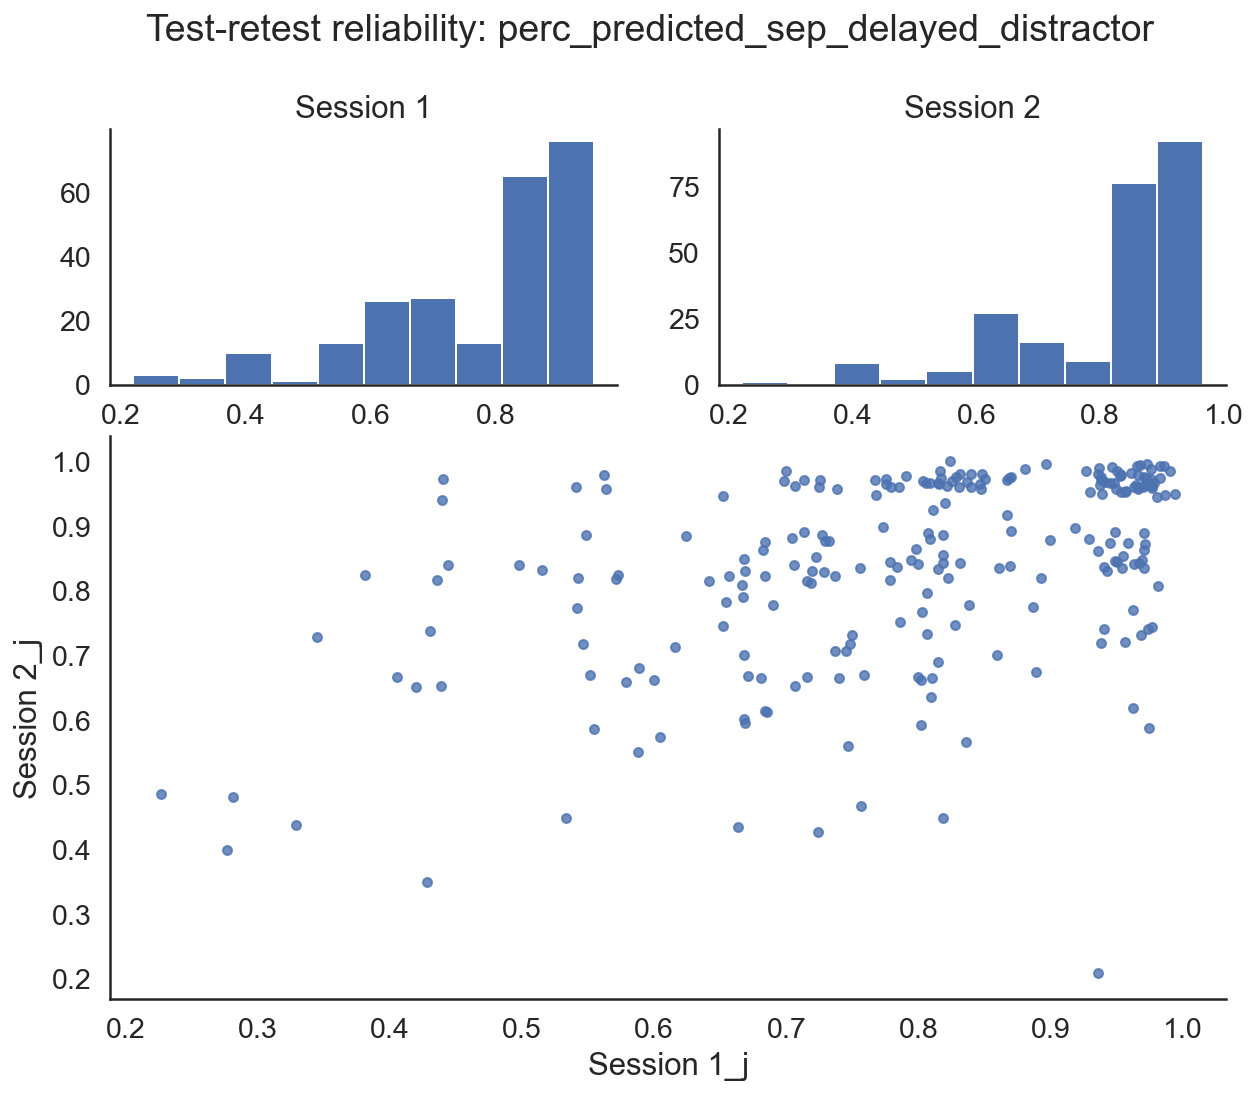

In [ ]:
perc_predicted_sep_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_delayed_distractor', add_jitter = True)

### Based on predicted values (joint model)

#### No distractor (long)

In [ ]:
_df, ms = wm_scoring.get_perc_correct_predicted_sep_trial(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.464,2.733,235.0,236.0,0.0,0.376,0.544,".46 (.38, .54)"
Single_random_raters,ICC2,0.464,2.733,235.0,235.0,0.0,0.376,0.544,".46 (.38, .54)"
Single_fixed_raters,ICC3,0.464,2.733,235.0,235.0,0.0,0.376,0.544,".46 (.38, .54)"
Average_raters_absolute,ICC1k,0.634,2.733,235.0,236.0,0.0,0.546,0.705,".63 (.55, .70)"
Average_random_raters,ICC2k,0.634,2.733,235.0,235.0,0.0,0.546,0.705,".63 (.55, .70)"
Average_fixed_raters,ICC3k,0.634,2.733,235.0,235.0,0.0,0.546,0.705,".63 (.55, .70)"


,variance,Percent
ID,0.007,0.464
Items,0.000,0.000
Residual,0.008,0.536
Total,0.015,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


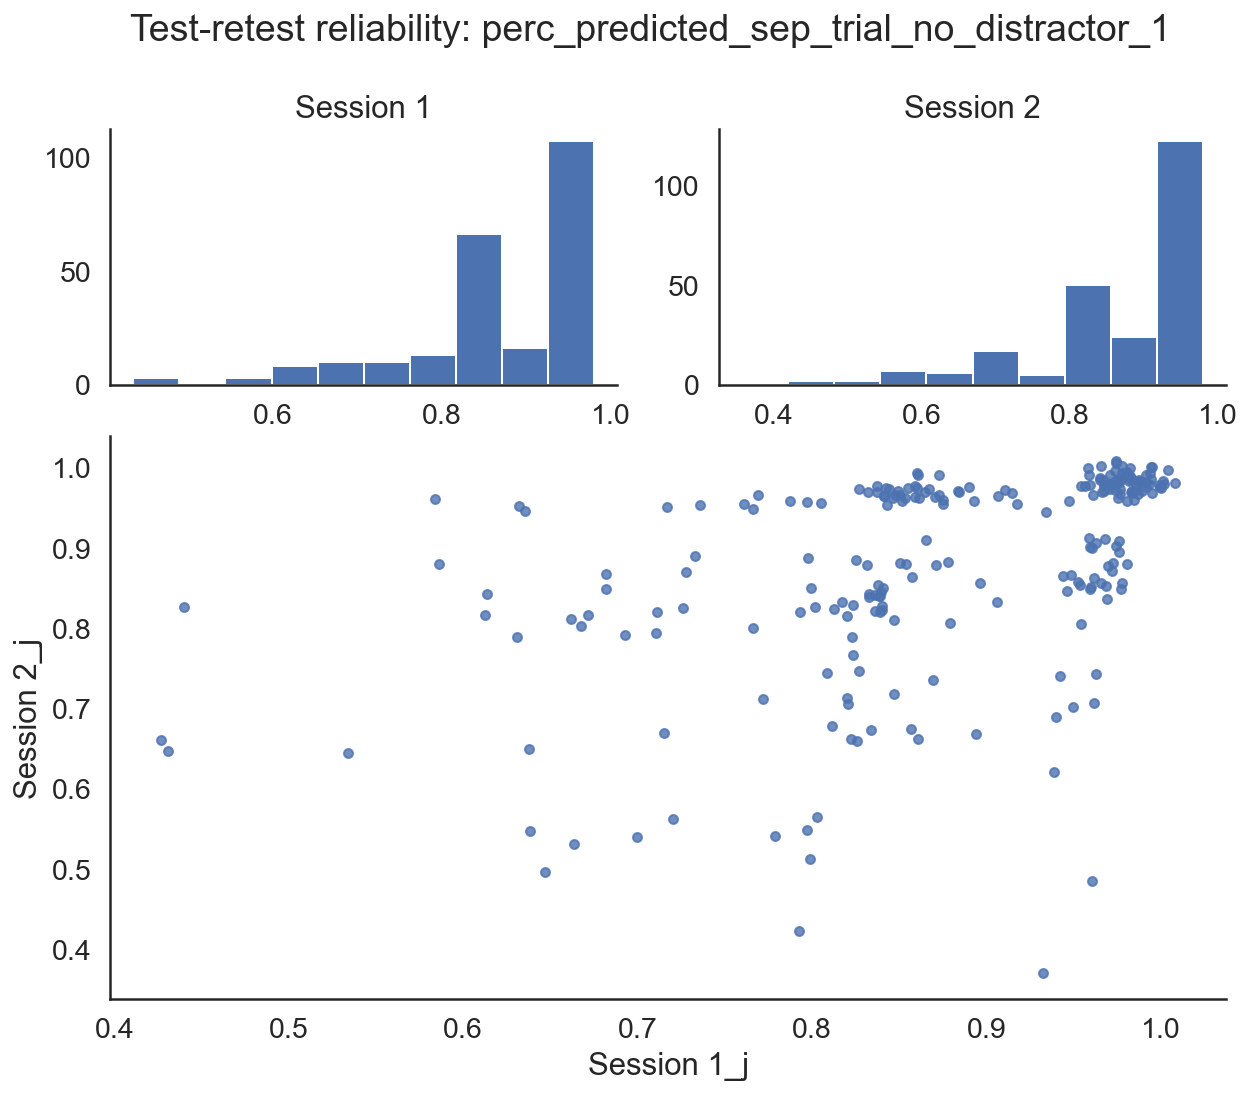

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_1', add_jitter = True)

In [ ]:
def get_model_calculated_icc(m):
    %R require(insight) -i m
    %R var_sess <- get_variance_intercept(m)[1]
    %R var_pp <- get_variance_intercept(m)[2]
    %R icc <- var_pp / (var_pp+(var_sess)) -o icc -o var_sess -o var_pp
    # Note that what get_variance_intercept outputs as session variance, we call residual, here
    variances = pd.DataFrame({"type":["Participant","Session","Residual"],"variance":[var_pp[0],0,var_sess[0]]})
    variances["Percent"] = variances.variance/variances.variance.sum()
    variances = {'iccs':[None, variances]}
    return {'icc':icc[0],'variances':variances}

iccs_perc_predicted_sep_trial_mod_no_distractor_1 = get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

R[write to console]: Loading required package: insight



0.5094778699520105

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.594,3.925,235.0,236.0,0.0,0.520,0.659,".59 (.52, .66)"
Single_random_raters,ICC2,0.594,3.925,235.0,235.0,0.0,0.520,0.659,".59 (.52, .66)"
Single_fixed_raters,ICC3,0.594,3.925,235.0,235.0,0.0,0.520,0.659,".59 (.52, .66)"
Average_raters_absolute,ICC1k,0.745,3.925,235.0,236.0,0.0,0.684,0.794,".75 (.68, .79)"
Average_random_raters,ICC2k,0.745,3.925,235.0,235.0,0.0,0.684,0.794,".75 (.68, .79)"
Average_fixed_raters,ICC3k,0.745,3.925,235.0,235.0,0.0,0.684,0.795,".75 (.68, .79)"


,variance,Percent
ID,0.012,0.594
Items,0.000,0.000
Residual,0.008,0.406
Total,0.020,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


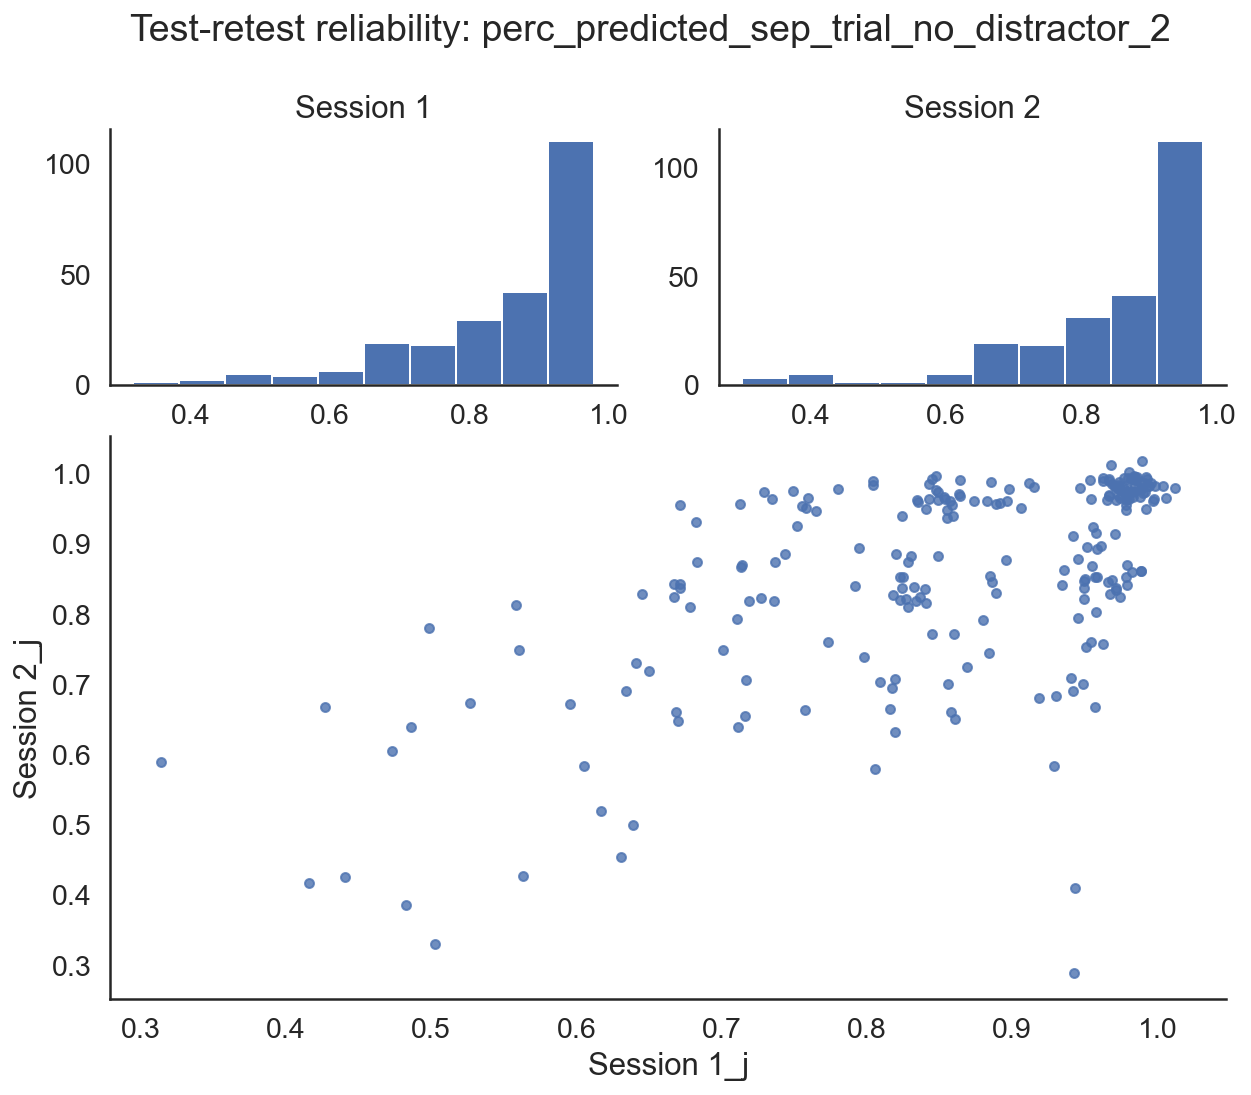

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_2', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.5324766661421272

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.496,2.965,235.0,236.0,0.0,0.410,0.572,".50 (.41, .57)"
Single_random_raters,ICC2,0.497,3.002,235.0,235.0,0.0,0.412,0.574,".50 (.41, .57)"
Single_fixed_raters,ICC3,0.500,3.002,235.0,235.0,0.0,0.415,0.576,".50 (.42, .58)"
Average_raters_absolute,ICC1k,0.663,2.965,235.0,236.0,0.0,0.582,0.728,".66 (.58, .73)"
Average_random_raters,ICC2k,0.664,3.002,235.0,235.0,0.0,0.584,0.729,".66 (.58, .73)"
Average_fixed_raters,ICC3k,0.667,3.002,235.0,235.0,0.0,0.587,0.731,".67 (.59, .73)"


,variance,Percent
ID,0.011,0.497
Items,0.000,0.006
Residual,0.011,0.497
Total,0.022,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


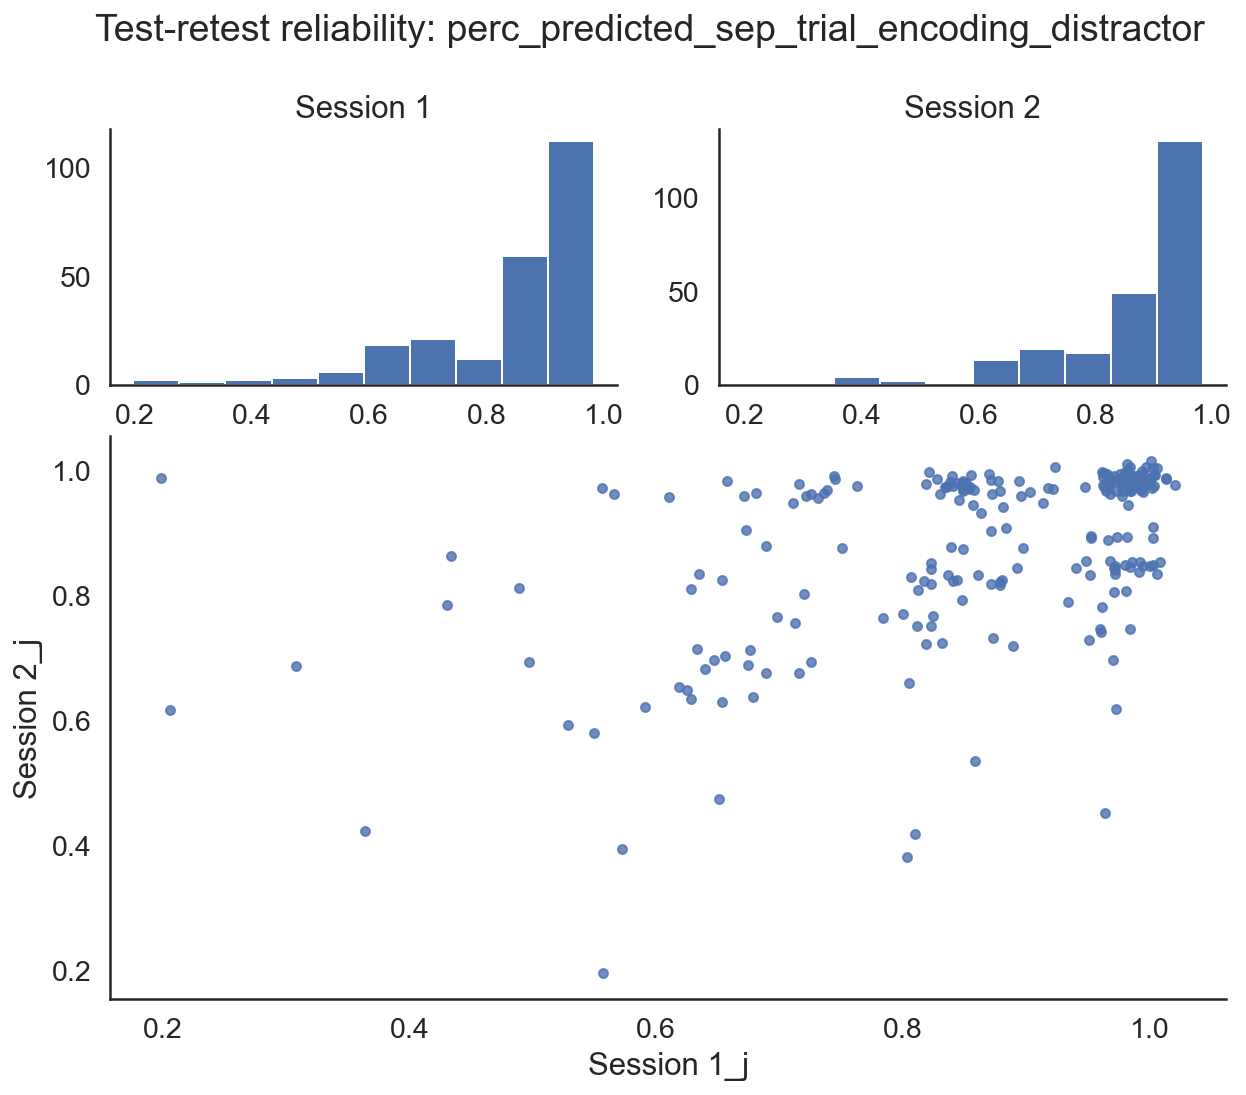

In [ ]:
perc_predicted_sep_trial_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_encoding_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.47502010452861687

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.607,4.084,235.0,236.0,0.0,0.534,0.670,".61 (.53, .67)"
Single_random_raters,ICC2,0.610,4.268,235.0,235.0,0.0,0.534,0.675,".61 (.53, .68)"
Single_fixed_raters,ICC3,0.620,4.268,235.0,235.0,0.0,0.550,0.682,".62 (.55, .68)"
Average_raters_absolute,ICC1k,0.755,4.084,235.0,236.0,0.0,0.696,0.802,".76 (.70, .80)"
Average_random_raters,ICC2k,0.758,4.268,235.0,235.0,0.0,0.696,0.806,".76 (.70, .81)"
Average_fixed_raters,ICC3k,0.766,4.268,235.0,235.0,0.0,0.709,0.811,".77 (.71, .81)"


,variance,Percent
ID,0.015,0.610
Items,0.000,0.017
Residual,0.009,0.373
Total,0.025,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


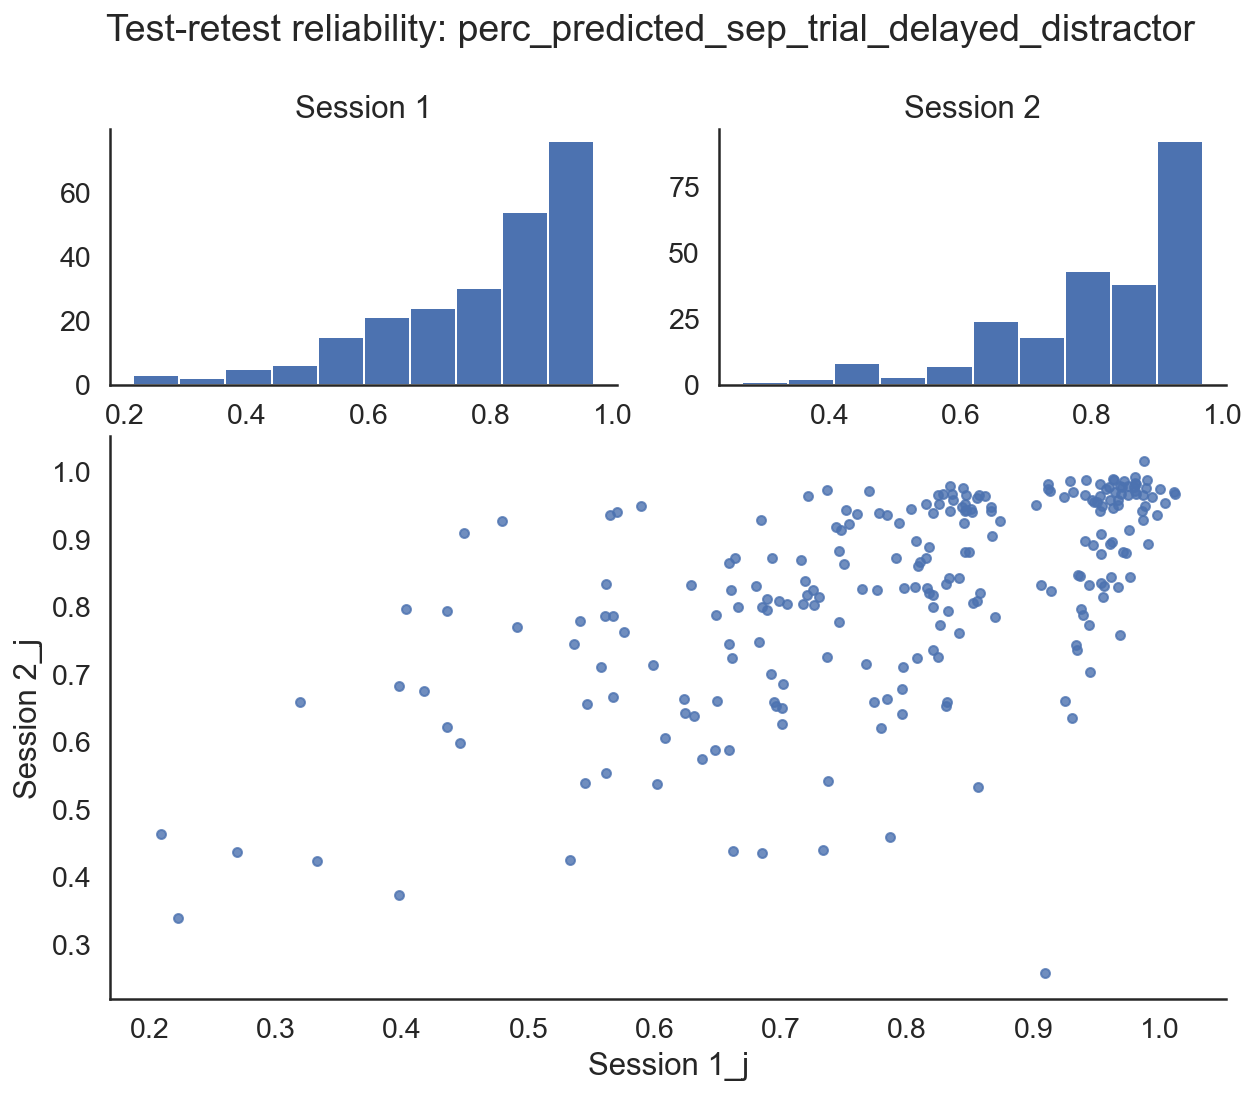

In [ ]:
perc_predicted_sep_trial_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_delayed_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.5805151234358624

### Based on model-calculated variances

#### No distractor (long)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_1 = stats.get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

0.5094778699520105

#### No distractor (short)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = stats.get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.5324766661421272

#### Enconding distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = stats.get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.47502010452861687

#### Delayed distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = stats.get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.5805151234358624

## Comparison of methods

### All methods

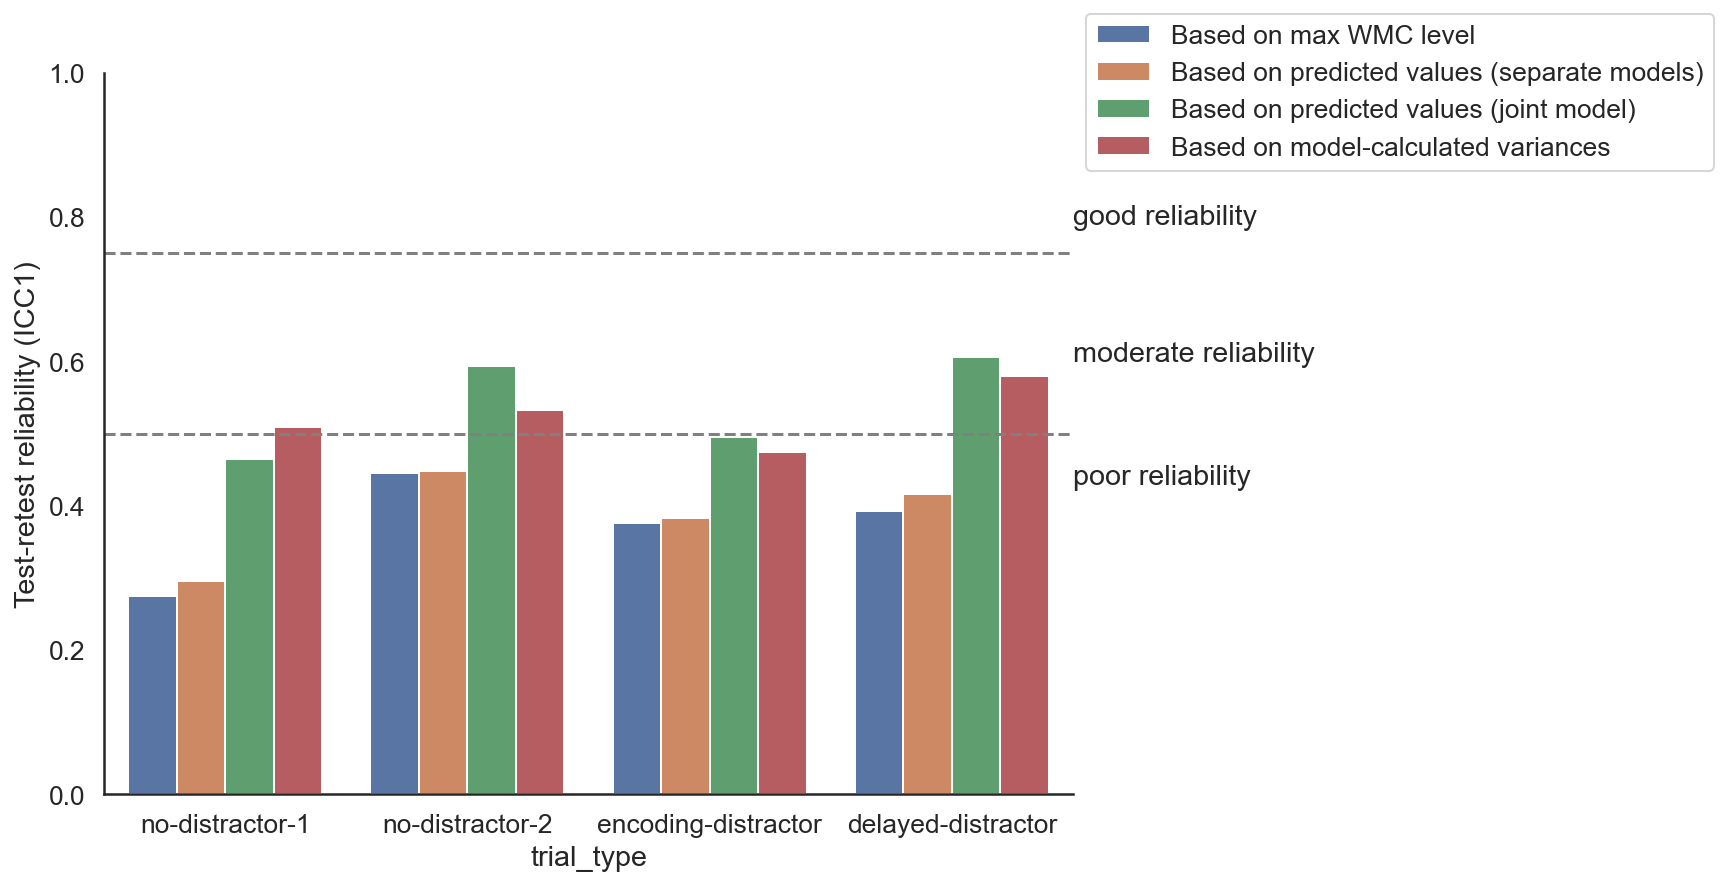

In [ ]:
iccs = {
    "Based on max WMC level_no-distractor-1": iccs_mean_no_distractor_1,
    "Based on max WMC level_no-distractor-2": iccs_mean_no_distractor_2,
    "Based on max WMC level_encoding-distractor": iccs_mean_encoding_distractor,
    "Based on max WMC level_delayed-distractor": iccs_mean_delayed_distractor,
    "trial_sep_no-distractor-1": iccs_perc_predicted_sep_no_distractor_1,
    "trial_sep_no-distractor-2": iccs_perc_predicted_sep_no_distractor_2,
    "trial_sep_encoding-distractor": perc_predicted_sep_encoding_distractor,
    "trial_sep_delayed-distractor": perc_predicted_sep_delayed_distractor,
    "trial_joint_no-distractor-1": iccs_perc_predicted_sep_trial_no_distractor_1,
    "trial_joint_no-distractor-2": iccs_perc_predicted_sep_trial_no_distractor_2,
    "trial_joint_encoding-distractor": perc_predicted_sep_trial_encoding_distractor,
    "trial_joint_delayed-distractor": perc_predicted_sep_trial_delayed_distractor,
    "model_calc_no-distractor-1": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "model_calc_no-distractor-2": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "model_calc_encoding-distractor": iccs_perc_predicted_sep_trial_mod_encoding_distractor,
    "model_calc_delayed-distractor": iccs_perc_predicted_sep_trial_mod_delayed_distractor  
}


g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

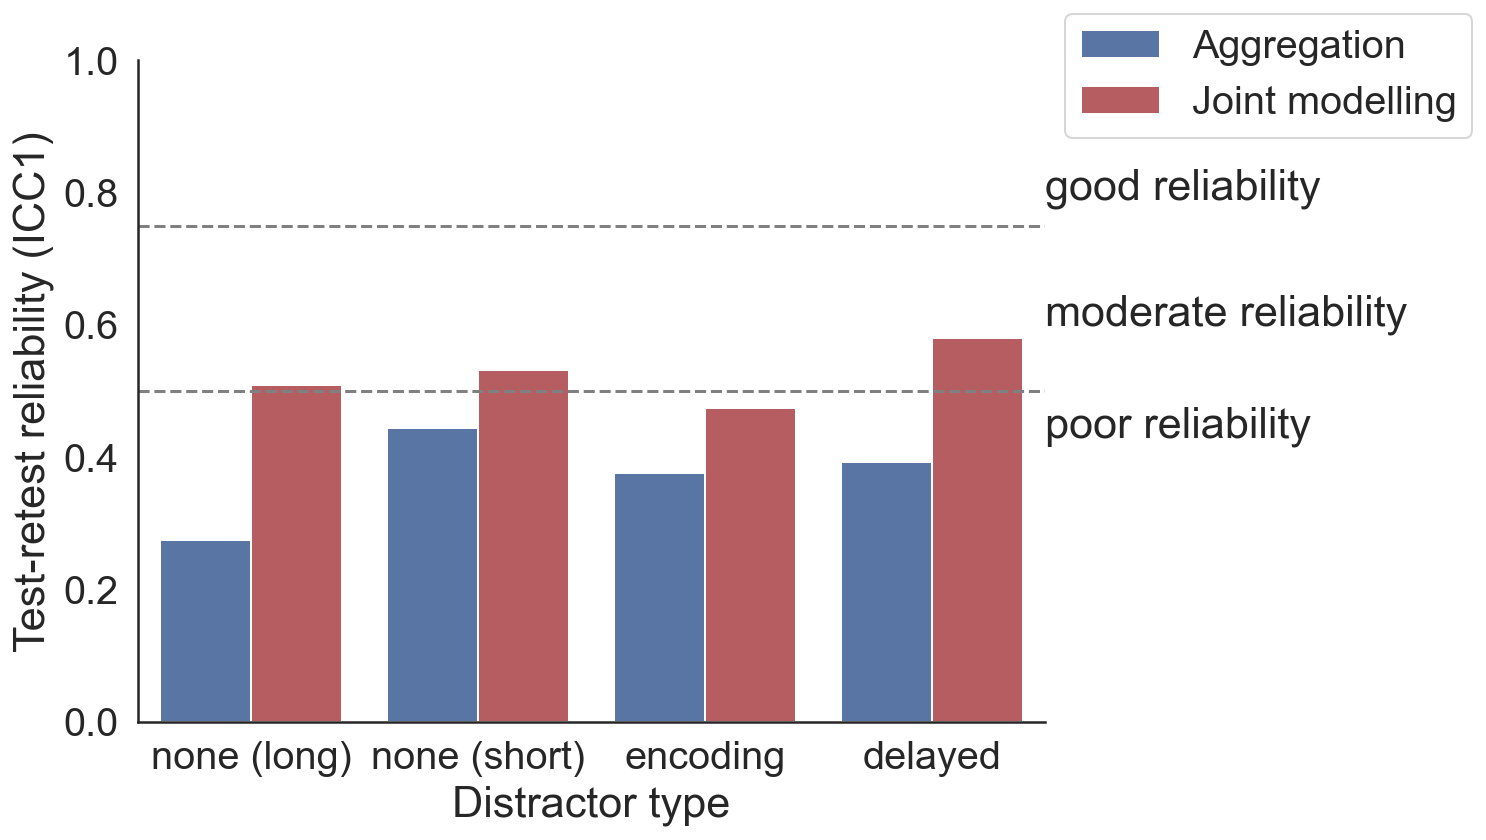

In [ ]:
iccs = {
    "Aggregation_none (long)": iccs_mean_no_distractor_1,
    "Joint modelling_none (long)": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "Aggregation_none (short)": iccs_mean_no_distractor_2,
    "Joint modelling_none (short)": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "Aggregation_encoding": iccs_mean_encoding_distractor,
    "Joint modelling_encoding": iccs_perc_predicted_sep_trial_mod_encoding_distractor, 
    "Aggregation_delayed": iccs_mean_delayed_distractor,
    "Joint modelling_delayed": iccs_perc_predicted_sep_trial_mod_delayed_distractor, 
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 3.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Distractor type');


## Variance components

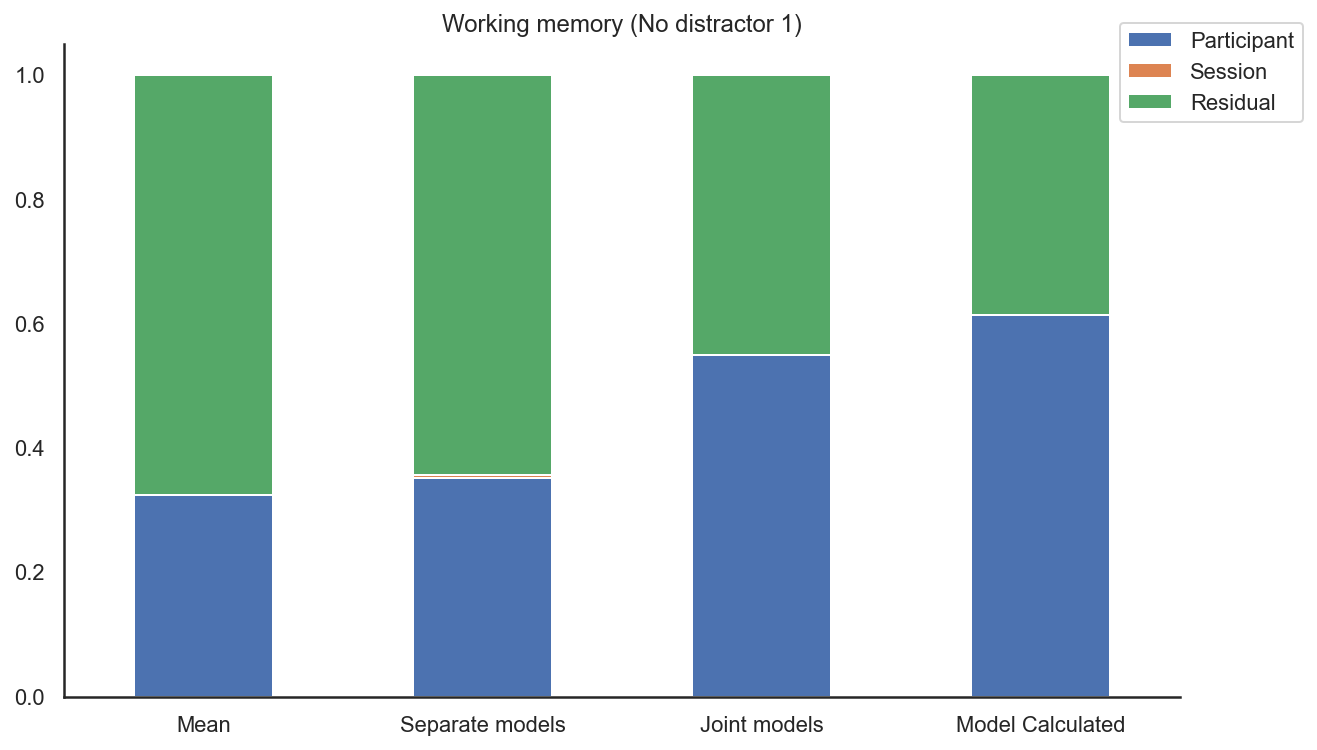

In [ ]:
sns.set_theme(style="white", font_scale = 1, rc=custom_params)

def var_comp_plot(title, results):
    perc_variance = []
    for r in results.items():
        variances = r[1]['iccs'][1]
        if "type" in variances.columns:
            variances = variances.set_index('type')
        variances = variances.T.rename(columns = {"ID":"Participant","Items":"Session"})
        perc_variance.append(variances[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    ax = df.plot(kind = 'bar', stacked = True, figsize = (10,6))
    ax.grid(False)
    sns.despine()
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)

var_comp_plot("Working memory (No distractor 1)",{'Mean':iccs_mean_no_distractor_1,'Separate models':iccs_perc_predicted_sep_no_distractor_1,'Joint models':iccs_perc_predicted_sep_trial_no_distractor_1,'Model Calculated':iccs_perc_predicted_sep_trial_mod_no_distractor_1['variances']})

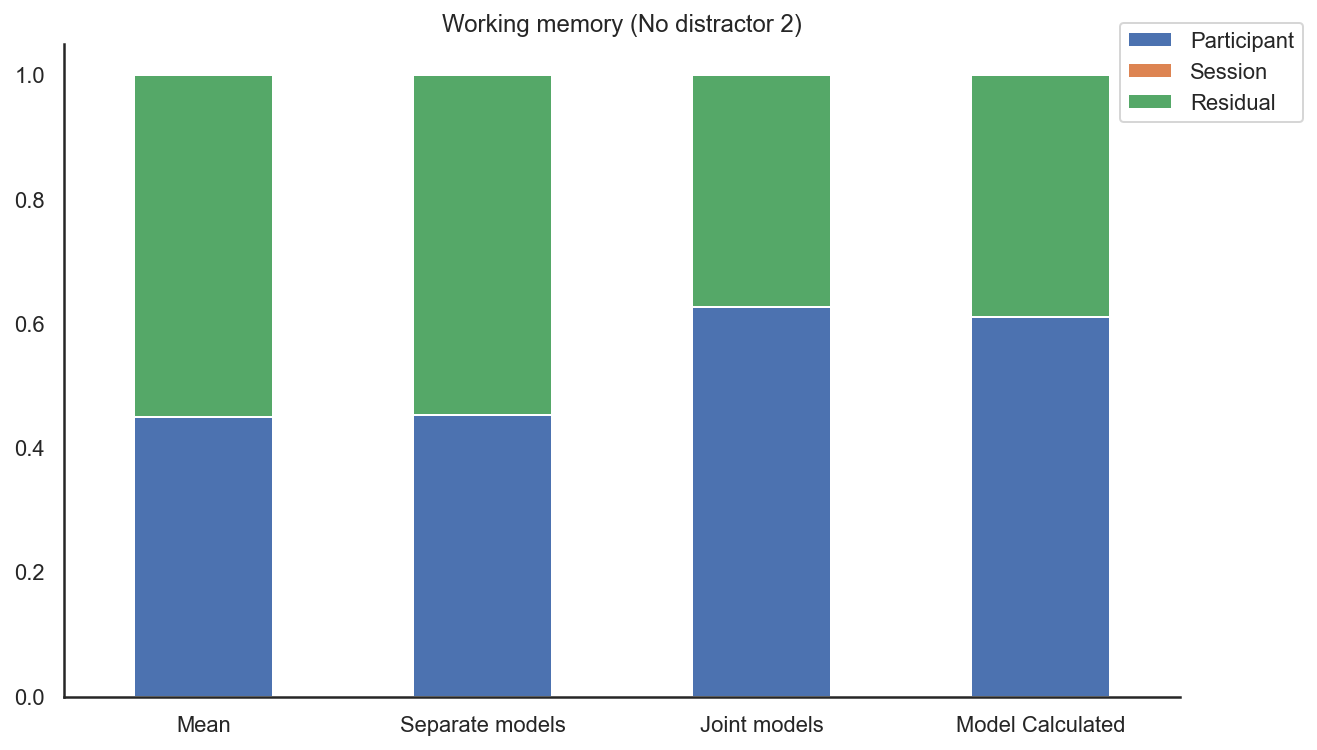

In [ ]:
var_comp_plot("Working memory (No distractor 2)",{'Mean':iccs_mean_no_distractor_2,'Separate models':iccs_perc_predicted_sep_no_distractor_2,'Joint models':iccs_perc_predicted_sep_trial_no_distractor_2,'Model Calculated':iccs_perc_predicted_sep_trial_mod_no_distractor_2['variances']})

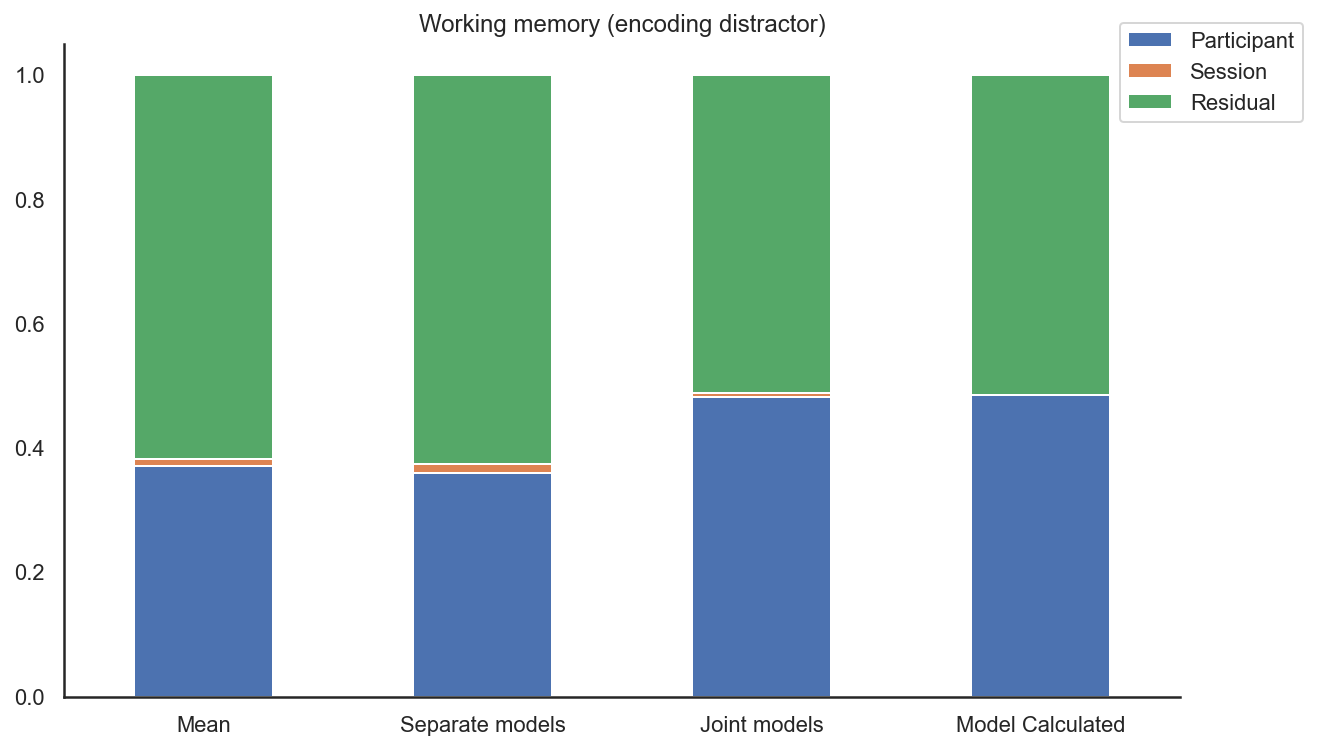

In [ ]:
var_comp_plot("Working memory (encoding distractor)",{'Mean':iccs_mean_encoding_distractor,'Separate models':perc_predicted_sep_encoding_distractor,'Joint models':perc_predicted_sep_trial_encoding_distractor,'Model Calculated':iccs_perc_predicted_sep_trial_mod_encoding_distractor['variances']})

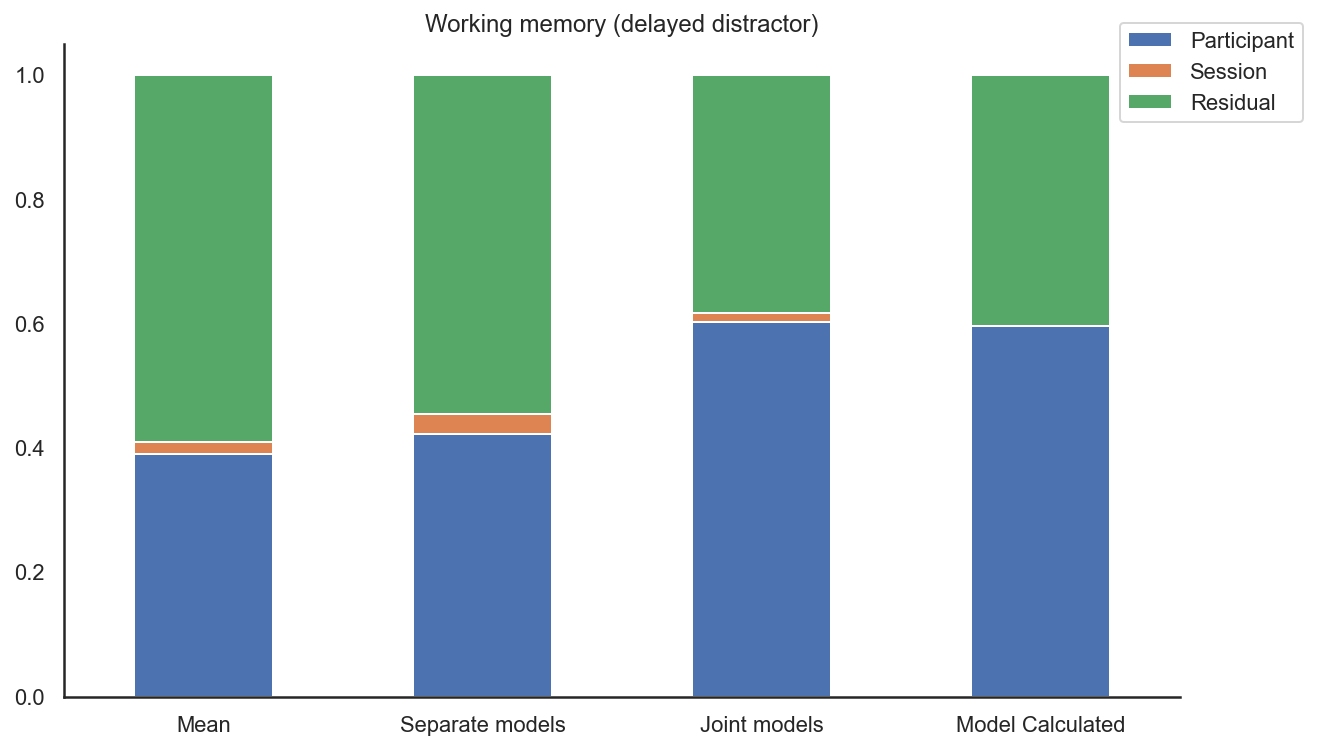

In [ ]:
var_comp_plot("Working memory (delayed distractor)",{'Mean':iccs_mean_delayed_distractor,'Separate models':perc_predicted_sep_delayed_distractor,'Joint models':perc_predicted_sep_trial_delayed_distractor,'Model Calculated':iccs_perc_predicted_sep_trial_mod_delayed_distractor['variances']})

## Effect of time

In [ ]:
def determine_ema_session_numbers(_df):
    '''Ema sessions start the earliest after sampling day 22.  The following year is split into 28-day intervals, each corresponding to one EMA session.'''
    _df['ema_session'] = pd.cut(_df.sampling_day, np.arange(21, 392, 28), labels = [x for x in range(1,14)]).astype(float)
    return _df
    
def check_repeating_sessions(_df):
    '''Sometimes EMA sessions end up happening in the same 28 days interval.  In these cases, participants therefore have repeating sessions.  If a repeating session is one the same day, it should certainly be removed.  However, if a repeating session happens far enough from other sessions and the subsequent session is missing, we can assume that this session is actually a real session.  Although, the nominal distance between sessions is 28 days, participants can postpone sessions, thus reducing the time to the next session.  Specifying at least 14 one days between sessions, therefore seems reasonable.'''
    _df['ema_session_repeating'] = ((_df.ema_session.astype(float) - _df.ema_session.astype(float).shift(1))==0)
    _df['total_ema_sessions_completed'] = _df.groupby('participant').ema_session.transform(lambda x:len(x.dropna().unique()))
    _df['time_since_last_session'] = ((_df.sampling_day - _df.groupby('participant').sampling_day.shift(1)))
    _df['time_to_next_session'] = ((_df.sampling_day - _df.groupby('participant').sampling_day.shift(-1))*-1)
    # Deciding wether to increase session number
    sessions_missing = _df['total_ema_sessions_completed'] < 13
    window = 14
    enough_distance = (_df.time_since_last_session>window) & (_df.time_to_next_session>window)
    _df['increase_session_number'] = (_df.ema_session_repeating & enough_distance & sessions_missing).astype(int)
    return _df

def increase_session_numbers(_df):
    _df['ema_session'] = _df.ema_session + _df.increase_session_number
    return(_df)

def filter_repeating_sessions(_df):
    _df = _df.query('ema_session_repeating==False')
    _df = _df.query('is_baseline or (ema_session.isna() == False)')
    return _df

def fix_repeating_ema_sessions(_df):
    _df = parse_ema_session_numbers(_df)
    old_df = _df
    for i in range(13):
        _df = check_repeating_sessions(_df)
        _df = increase_session_numbers(_df)
    old_sessions = _df.index
    
    _df = filter_repeating_sessions(_df)
    new_sessions = _df.index
    removed_sessions = list((set(old_sessions)-set(new_sessions)))
    #return old_df.loc[removed_sessions]
    removed_participants = list(set([s.split('_')[0] for s in removed_sessions]))
    _df = filter_repeating_sessions(_df)
    _df = check_repeating_sessions(_df)
    print("%d participants had unplanned sessions.  %d sessions (%.2f%%) were removed."%(len(removed_participants), len(removed_sessions), len(old_df)/len(removed_sessions)))
    return _df

gbe_data = dp.get_gbe_data(columns = ['participant','starting_date','trigger_type','session_number','is_initial','is_baseline','time_since_last_gbe','sampling_day']).query('is_initial')
#gbe_data = fix_repeating_ema_sessions(gbe_data)
gbe_data.trigger_type.value_counts()

ema         1670
optional     809
initial      675
Name: trigger_type, dtype: int64

In [ ]:
gbe_data[['sampling_day','is_baseline','session_number','ema_session','trigger_type','time_since_last_session','ema_session_repeating','total_ema_sessions_completed']].query('session_number==3').sampling_day.value_counts()

23.0     33
24.0     23
29.0     11
25.0      9
50.0      9
51.0      9
28.0      8
31.0      5
26.0      5
57.0      5
52.0      4
27.0      4
36.0      3
80.0      3
53.0      3
59.0      2
79.0      2
84.0      2
78.0      2
32.0      1
148.0     1
117.0     1
35.0      1
45.0      1
85.0      1
106.0     1
144.0     1
43.0      1
40.0      1
67.0      1
81.0      1
164.0     1
54.0      1
142.0     1
49.0      1
44.0      1
120.0     1
90.0      1
37.0      1
177.0     1
86.0      1
138.0     1
56.0      1
87.0      1
Name: sampling_day, dtype: int64

In [ ]:
gbe_data.query("participant=='m066'")[['sampling_day','is_baseline','ema_session','time_since_last_session','ema_session_repeating','total_ema_sessions_completed']]

,sampling_day,is_baseline,ema_session,time_since_last_session,ema_session_repeating,total_ema_sessions_completed
gbe_index,,,,,,
m066_001,1.0,True,NaN,NaN,False,7
m066_002,1.0,True,NaN,0.0,False,7
m066_004,55.0,False,2.0,54.0,False,7
m066_005,78.0,False,3.0,23.0,False,7
m066_006,134.0,False,4.0,56.0,False,7
m066_007,138.0,False,5.0,4.0,False,7
m066_008,180.0,False,6.0,42.0,False,7
m066_009,203.0,False,7.0,23.0,False,7
m066_010,241.0,False,8.0,38.0,False,7


In [ ]:
gbe_data.query('(time_since_last_session < 5) and (is_baseline == False)')[['sampling_day','is_baseline','ema_session','ema_session_repeating','total_ema_sessions_completed']]

,sampling_day,is_baseline,ema_session,ema_session_repeating,total_ema_sessions_completed
gbe_index,,,,,
m055_005,79.0,False,3.0,False,9
m066_007,138.0,False,5.0,False,7


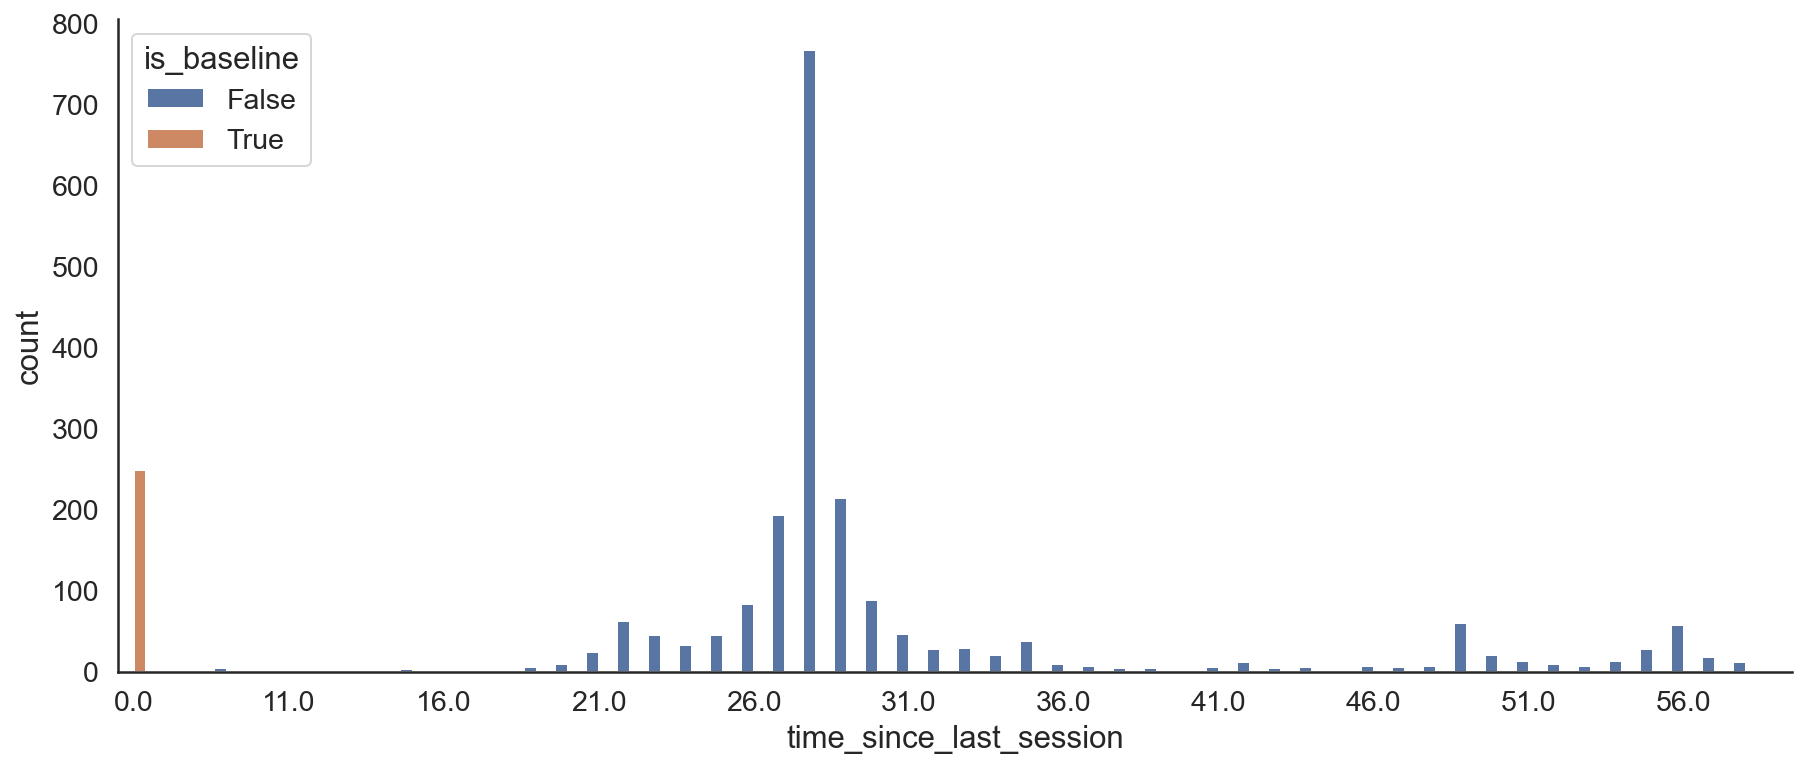

In [ ]:
def test_time_since_last_session(df):
    fig, ax = plt.subplots(figsize=(15,6))
    ax = sns.countplot(x = 'time_since_last_session', hue = 'is_baseline', data = df.query('(time_since_last_session < 60)'))
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        label.set_visible(False)
        if index%5==0:
            label.set_visible(True)
test_time_since_last_session(gbe_data)

In [ ]:
participants = test.participant.unique()
gbe_data.query('participant == "m199"')[['sampling_day','is_baseline','ema_session','ema_session_repeating','total_ema_sessions_completed','starting_date']]
# check how many removed sessions were bedarfstarts

,sampling_day,is_baseline,ema_session,ema_session_repeating,total_ema_sessions_completed,starting_date
gbe_index,,,,,,
m199_001,1.0,True,NaN,False,7,2021-06-06
m199_002,1.0,True,NaN,False,7,2021-06-06
m199_005,37.0,False,1.0,False,7,2021-06-06
m199_006,66.0,False,2.0,False,7,2021-06-06
m199_007,97.0,False,3.0,False,7,2021-06-06
m199_008,122.0,False,4.0,False,7,2021-06-06
m199_009,149.0,False,5.0,False,7,2021-06-06
m199_010,179.0,False,6.0,False,7,2021-06-06
m199_011,206.0,False,7.0,False,7,2021-06-06


count    300.000000
mean       0.639112
std        0.333343
min        0.000000
25%        0.383484
50%        0.769231
75%        0.923077
max        1.000000
Name: gbe_compliance, dtype: float64


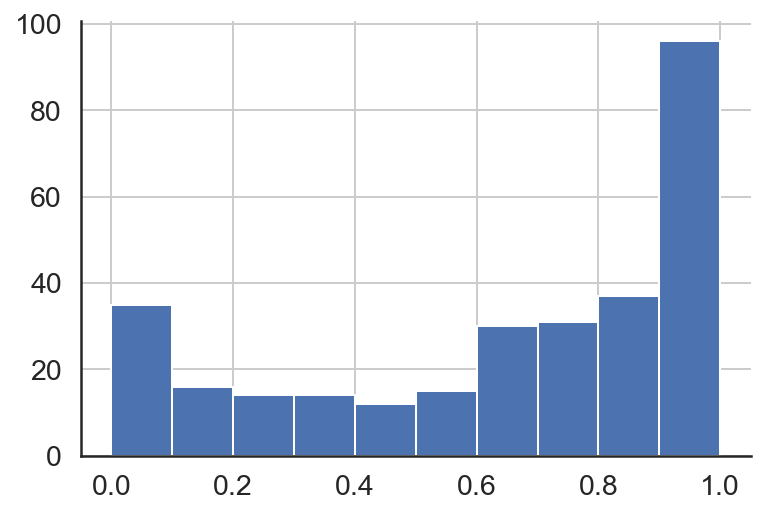

In [ ]:
def test_compliance(_df):
    '''Note that this function will underestimate compliance if the newest data is not downloaded.'''
    basedate = pd.to_datetime('2022-01-14')
    _df['study_days_since_start'] = (basedate - _df['starting_date']).dt.days
    _df.loc[_df['study_days_since_start'] >= 392, 'study_days_since_start'] = 392
    _df['expected_ema_sessions'] = (_df.study_days_since_start - 28)/28
    _df[['starting_date','study_days_since_start','expected_ema_sessions']]
    _df['gbe_compliance'] = _df.total_ema_sessions_completed / _df.expected_ema_sessions
    _df.loc[_df['gbe_compliance'] >= 1, 'gbe_compliance'] = 1
    _df.groupby('participant').first().gbe_compliance.hist()
    print(_df.groupby('participant').first().gbe_compliance.describe())
test_compliance(gbe_data)

In [ ]:
_df.query('gbe_compliance>1').participant.unique()

array(['b130', 'b133', 'b147', 'b165', 'b201', 'd035', 'd041', 'd044',
       'd047', 'd050', 'd073', 'd074', 'd075', 'd084', 'd087', 'd088',
       'd089', 'd091', 'd122', 'm117', 'm146', 'm176', 'm177', 'm178',
       'm180', 'm192', 'm193', 'm199'], dtype=object)

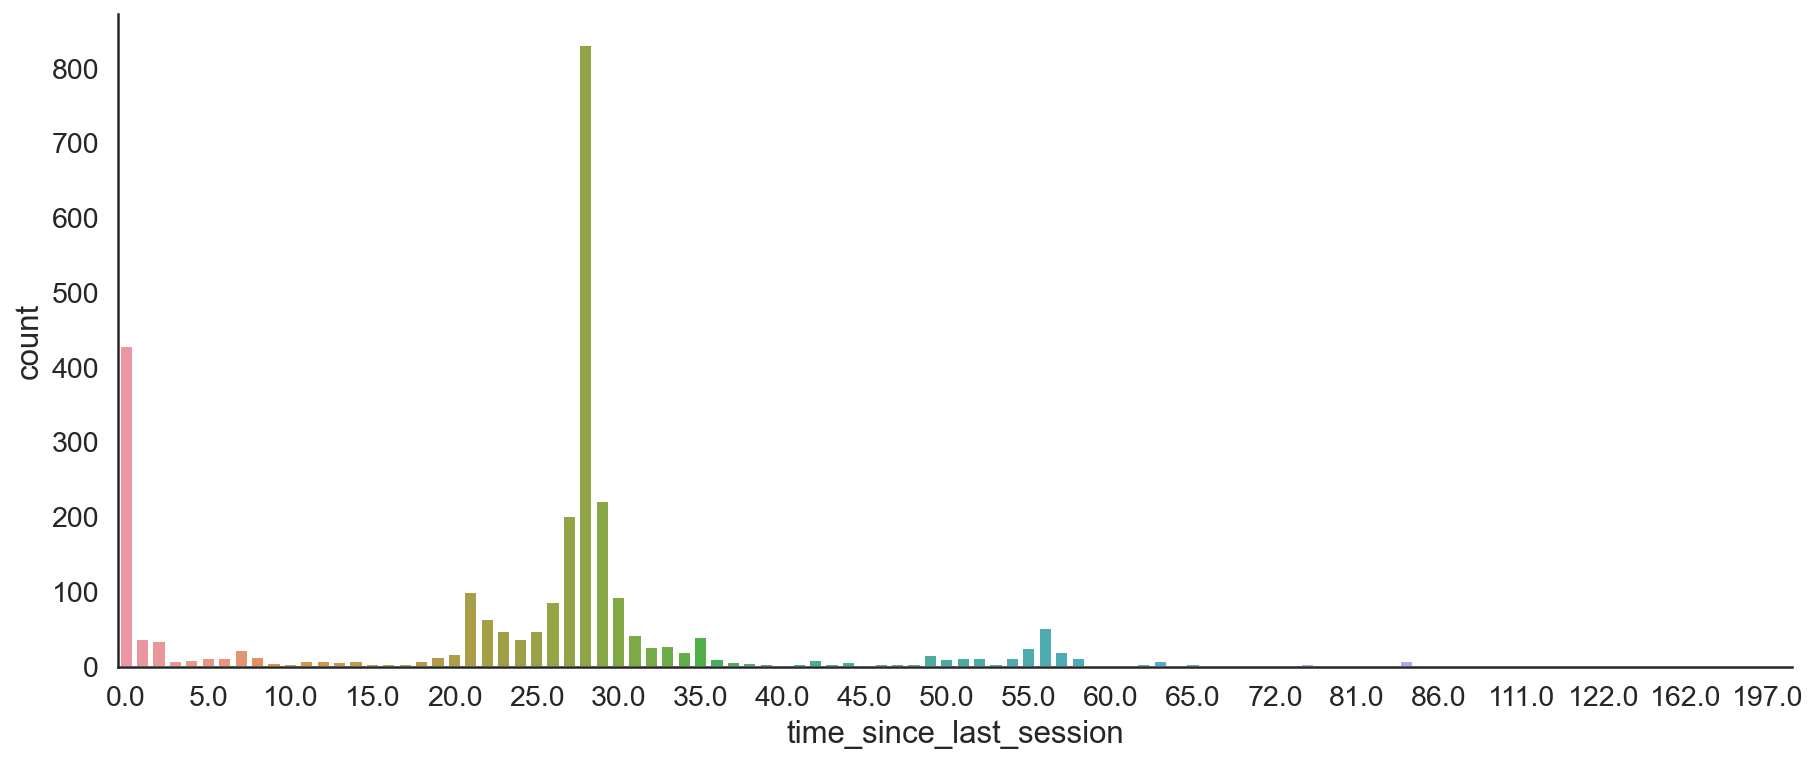

In [ ]:
def test_time_since_last_session(df):
    fig, ax = plt.subplots(figsize=(15,6))
    ax = sns.countplot(df.time_since_last_session)
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        label.set_visible(False)
        if index%5==0:
            label.set_visible(True)
test_time_since_last_session(gbe_data)

In [ ]:
basedate = pd.to_datetime('2022-01-14')
_df['study_days_since_start'] = (basedate - _df['starting_date']).dt.days
_df.loc[_df['study_days_since_start'] >= 392, 'study_days_since_start'] = 392
_df['expected_ema_sessions'] = (_df.study_days_since_start - 28)/28
_df[['starting_date','study_days_since_start','expected_ema_sessions']]
_df['gbe_compliance'] = _df.total_ema_sessions_completed / _df.expected_ema_sessions
_df.groupby('participant').first().gbe_compliance.hist()
_df.groupby('participant').first().gbe_compliance.describe()

In [ ]:
def get_icc(_df,
            dependent,
           icc_type = 'ICC2'):    
    # Getting icc and variances
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc['Percent']
    display(variances)    
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']

# Getting the data
_df = dp.get_wm_data()
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline','time_since_last_gbe','sampling_day']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering
_df = _df[_df.is_initial==True]
_df = dp.filter_old_app_sessions(_df)
_df = dp.filter_level_two_failures(_df)
# Scoring
res = wm_scoring.get_max_levels(_df)
if len(res) == 2:
    _df, ms = res
else:
    _df = res
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline','time_since_last_gbe','sampling_day','starting_date']), left_on = 'gbe_index', right_index = True, how = 'left')
initial_sampling_days = _df[_df.is_baseline==True].groupby('participant').sampling_day.min()
initial_sampling_days.name = "initial_sampling_day"
_df = _df.merge(initial_sampling_days, left_on = 'participant', right_index = True, how = 'left')
_df['time_since_baseline'] = _df.sampling_day - _df.initial_sampling_day

#iccs, participant_var, session_var, residual_var = [None], [None], [None], [None]
#iccs[0], participant_var[0], session_var[0], residual_var[0] = get_icc(_df.query("is_baseline"), "max_level_no_distractor_1")
#
#for i in range(1,2):
#    sampling_day = i * 30
#    session_filter = "(session_number==1) or ((sampling_day>%d) and (sampling_day<%d))"%(sampling_day-15, sampling_day+15)
#    _df = _df.query(session_filter)
#    for i in range(3,40):
#        
#    display(_df)
#    print('ho')
#    iccs[i], participant_var[i], session_var[i], residual_var[i] = get_icc(_df, "max_level_no_distractor_1")
#    
#
#iccs, participant_var, session_var, residual_var
#    
    

9 participants used an old version of the task in some of their sessions.  41 sessions (1.33%) were removed from the dataset.
36 sessions (1.18%) were removed because participants failed a level two trial.


1) first ema starts on sampling day 22
2) 8 "baseline sessions" happened after that day; these should be excluded from the sample

In [ ]:
# Note that I'm working with sessions that have already been filtered for data availability.  This function should be inserted into get_gbe data after the point where sessions without data are already excluded.

# Considering that all data is complete.  Repeating sessions could actually be immediately removed (after some additional careful checking, of course).  A testing function, checking for e.g., compliance, percentage of data that falls into protocol times, average daily deviation from protocol times, average distance between sessions, would also be useful.


def parse_ema_session_numbers(_df):
    '''Ema sessions start the earliest after sampling day 22.  The following year is split into 28-day intervals, each corresponding to one EMA session.'''
    _df['ema_session'] = pd.cut(_df.sampling_day, np.arange(22, 392, 28), labels = [x for x in range(1,14)]).astype(float)
    return _df
    
def check_repeating_sessions(_df):
    '''Sometimes EMA sessions end up happening in the same 28 days interval.  In these cases, participants therefore have repeating sessions.  If a repeating session is one the same day, it should certainly be removed.  However, if a repeating session happens far enough from other sessions and the subsequent session is missing, we can assume that this session is actually a real session.  Although, the nominal distance between sessions is 28 days, participants can postpone sessions, thus reducing the time to the next session.  Specifying at least 14 one days between sessions, therefore seems reasonable.'''
    _df['ema_session_repeating'] = ((_df.ema_session.astype(float) - _df.ema_session.astype(float).shift(1))==0)
    print(_df.ema_session_repeating.sum())
    _df['total_ema_sessions_completed'] = _df.groupby('participant').ema_session.transform(lambda x:len(x.dropna().unique()))
    _df['time_since_last_session'] = ((_df.sampling_day - _df.groupby('participant').sampling_day.shift(1)))
    _df['time_to_next_session'] = ((_df.sampling_day - _df.groupby('participant').sampling_day.shift(-1))*-1)
    # Deciding wether to increase session number
    sessions_missing = _df['total_ema_sessions_completed'] < 13
    window = 14
    enough_distance = (_df.time_since_last_session>window) & (_df.time_to_next_session>window)
    _df['increase_session_number'] = (_df.ema_session_repeating & enough_distance & sessions_missing).astype(int)
    return _df

def increase_session_numbers(_df):
    _df['ema_session'] = _df.ema_session + _df.increase_session_number
    return(_df)

def filter_repeating_sessions(_df):
    _df = _df.query('ema_session_repeating==False')
    _df = _df.query('is_baseline or (ema_session.isna() == False)')
    return _df
    
    
 
_df = parse_ema_session_numbers(_df)
for i in range(13):
    _df = check_repeating_sessions(_df)
    _df = increase_session_numbers(_df)
_df = filter_repeating_sessions(_df)

248
210
202
197
195
194
193
193
193
193
193
193
193


In [ ]:
_df.query('ema_session_repeating')[['sampling_day','ema_session','ema_session_repeating']].iloc[:50]

,sampling_day,ema_session,ema_session_repeating
gbe_index,,,


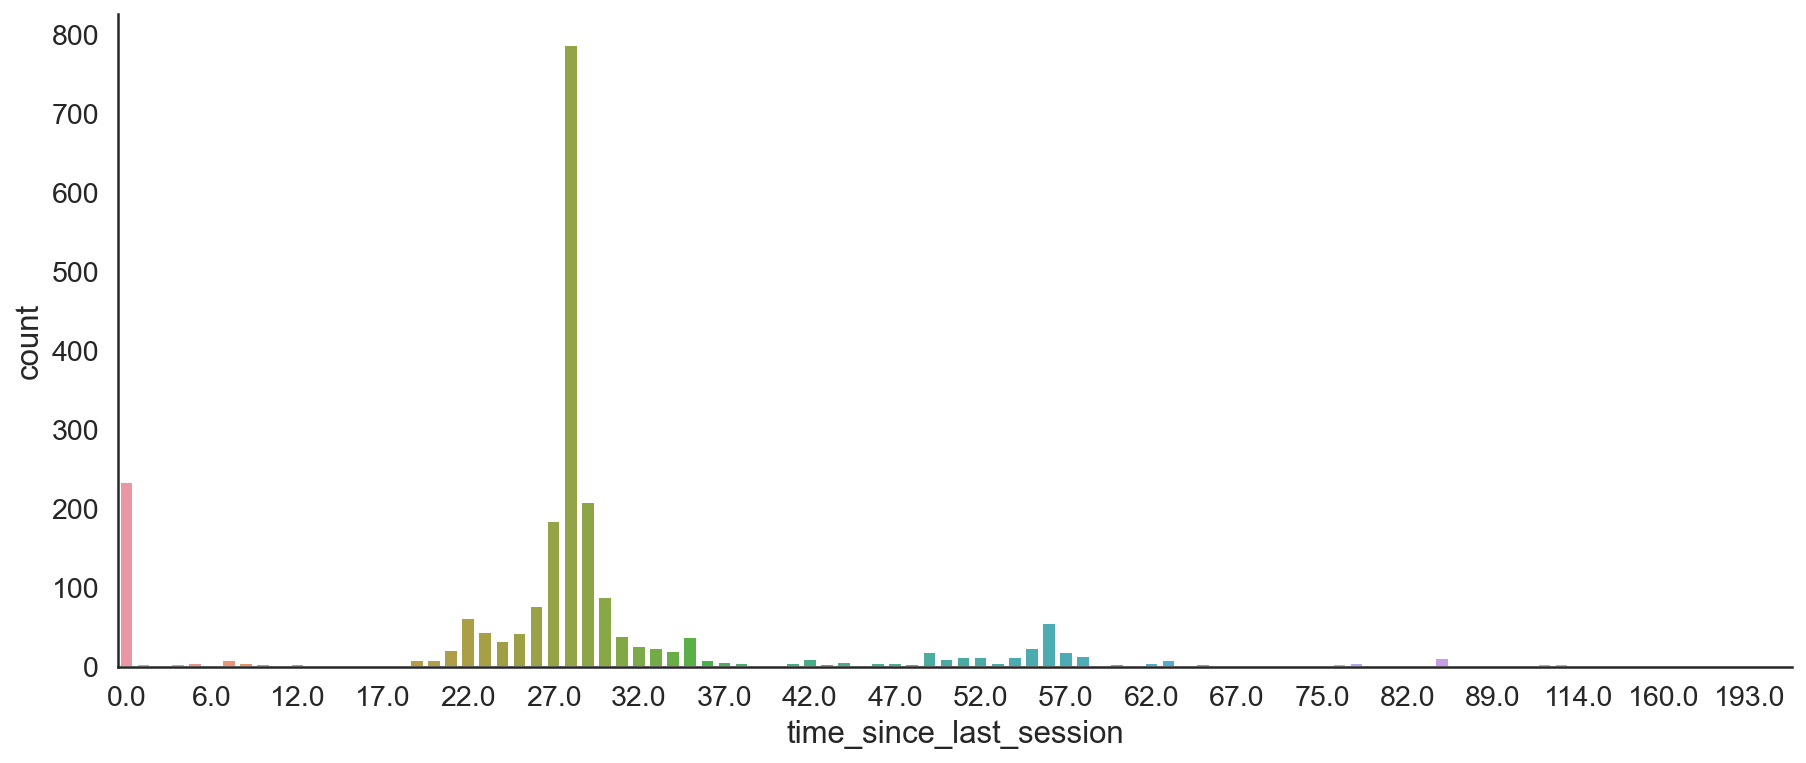

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(_df.time_since_last_session)
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_visible(False)
    if index%5==0:
        label.set_visible(True)

count    296.000000
mean       0.630897
std        0.337638
min        0.000000
25%        0.374430
50%        0.764706
75%        0.923077
max        1.160622
Name: gbe_compliance, dtype: float64

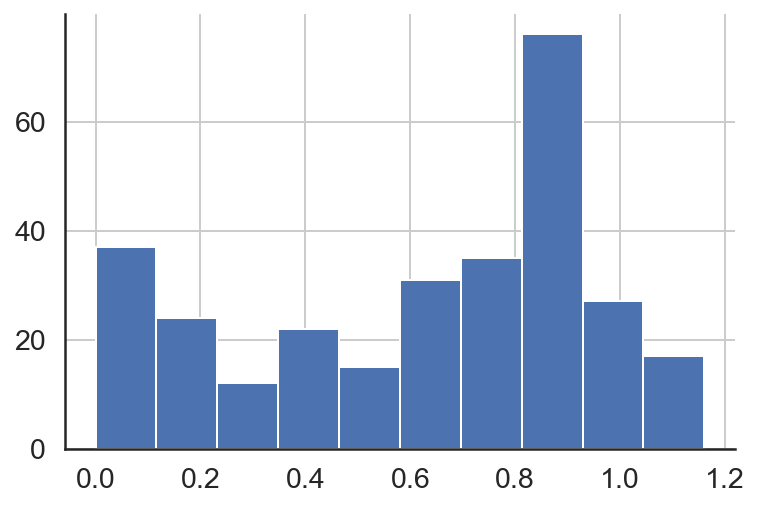

In [ ]:
basedate = pd.to_datetime('2022-01-14')
_df['study_days_since_start'] = (basedate - _df['starting_date']).dt.days
_df.loc[_df['study_days_since_start'] >= 392, 'study_days_since_start'] = 392
_df['expected_ema_sessions'] = (_df.study_days_since_start - 28)/28
_df[['starting_date','study_days_since_start','expected_ema_sessions']]
_df['gbe_compliance'] = _df.total_ema_sessions_completed / _df.expected_ema_sessions
_df.groupby('participant').first().gbe_compliance.hist()
_df.groupby('participant').first().gbe_compliance.describe()

In [ ]:
_df.query('participant=="b083"')[['sampling_day','session_number','is_baseline','ema_session','time_since_last_session']]

,sampling_day,session_number,is_baseline,ema_session,time_since_last_session
gbe_index,,,,,
b083_001,4.0,1,True,NaN,NaN
b083_002,4.0,2,True,NaN,0.0
b083_003,23.0,3,False,1.0,19.0
b083_006,78.0,6,False,2.0,28.0
b083_007,106.0,7,False,3.0,28.0
b083_008,141.0,8,False,5.0,35.0
b083_009,169.0,9,False,6.0,28.0
b083_010,197.0,10,False,7.0,28.0
b083_011,225.0,11,False,8.0,28.0


In [ ]:
_df.query('(is_baseline==False) and (time_since_last_session < 1)')

,max_level_no_distractor_1,max_level_no_distractor_2,max_level_encoding_distractor,max_level_delayed_distractor,participant,session_number,is_initial,is_baseline,time_since_last_gbe,sampling_day,...,time_since_baseline,ema_session,ema_session_repeating,total_ema_sessions_completed,time_since_last_session,time_to_next_session,increase_session_number,study_days_since_start,expected_ema_sessions,gbe_compliance
gbe_index,,,,,,,,,,,,,,,,,,,,,


<AxesSubplot:>

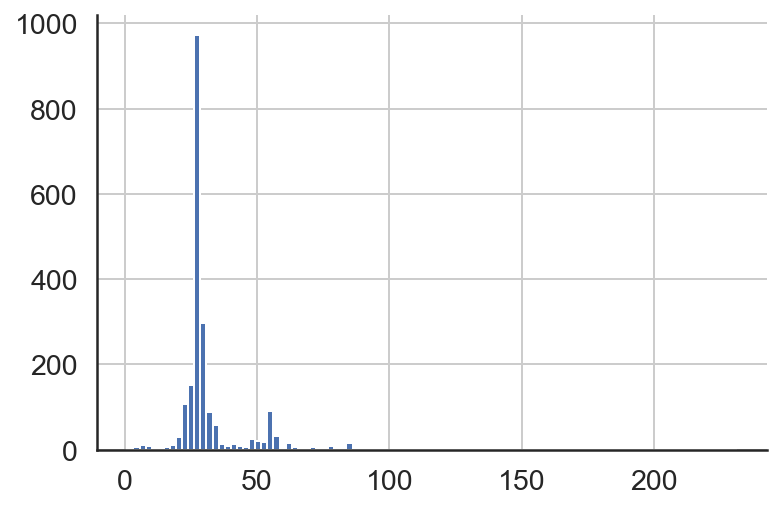

In [ ]:
_df.query('is_baseline==False').time_since_last_session.hist(bins = 100)

In [ ]:
pps = _df.query('ema_session_repeating').participant.unique()
_df.query('participant==@pps[6]')[['sampling_day','session_number','ema_session','ema_session_repeating','increase_session_number','time_since_last_session','time_to_next_session','total_ema_sessions_completed']]


,sampling_day,session_number,ema_session,ema_session_repeating,increase_session_number,time_since_last_session,time_to_next_session,total_ema_sessions_completed
gbe_index,,,,,,,,
b059_001,1.0,1,NaN,False,0,NaN,-0.0,10
b059_002,1.0,2,NaN,False,0,0.0,22.0,10
b059_003,23.0,3,1.0,False,0,22.0,29.0,10
b059_004,52.0,4,2.0,False,0,29.0,27.0,10
b059_005,79.0,5,3.0,False,0,27.0,28.0,10
b059_006,107.0,6,4.0,False,0,28.0,28.0,10
b059_007,135.0,7,5.0,False,0,28.0,28.0,10
b059_008,163.0,8,6.0,False,0,28.0,-0.0,10
b059_009,163.0,9,6.0,True,0,0.0,29.0,10


In [ ]:
test = df.groupby('gbe_index').first()

In [ ]:
test.query('sampling_day==1').trigger_date.dt.weekday.value_counts()

0    417
6     10
1      2
2      1
Name: trigger_date, dtype: int64

In [ ]:
_df[(_df.sampling_day ==1) and ]

In [ ]:
_df.query('sampling_day==1').trigger_date.dt.weekday.value_counts()

0    456
6     10
1      2
2      1
Name: trigger_date, dtype: int64

Baseline is nominally done on monday after signup.

In [ ]:
mov = dp.get_mov_data()

In [ ]:
mov.query('(sampling_day>400)').participant

mov_index
185218    m047
185219    m047
185220    m047
185221    m047
185222    m047
          ... 
279718    m205
279719    m205
279720    m205
279721    m205
279722    m205
Name: participant, Length: 215, dtype: object

In [ ]:
m--s---m--

In [ ]:
_df

,max_level_no_distractor_1,max_level_no_distractor_2,max_level_encoding_distractor,max_level_delayed_distractor,participant,session_number,is_initial,is_baseline,time_since_last_gbe,sampling_day,initial_sampling_day,time_since_baseline
gbe_index,,,,,,,,,,,,
b001_001,10,10,9,9,b001,1,True,True,0.0,1.0,1.0,0.0
b001_002,9,10,10,9,b001,2,True,True,0.0,1.0,1.0,0.0
b001_003,9,9,10,10,b001,3,True,False,22.0,23.0,1.0,22.0
b001_004,10,10,10,10,b001,4,True,False,118.0,141.0,1.0,140.0
b001_005,10,9,10,10,b001,5,True,False,63.0,204.0,1.0,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...
m271_006,7,9,9,8,m271,6,True,False,28.0,108.0,1.0,107.0
m271_007,9,9,6,7,m271,7,True,False,28.0,136.0,1.0,135.0
m271_008,8,8,9,8,m271,8,True,False,28.0,164.0,1.0,163.0


In [ ]:
mov_data = dp.get_mov_data()

In [ ]:
mov_data['is_gbe'] = mov_data['Trigger'].str.contains('GBE')

False    290488
True       4324
Name: is_gbe, dtype: int64

In [ ]:
mov_data.query('(is_gbe) and (sampling_day==44)')[['participant','starting_date','coupling_date','Trigger']]

,participant,starting_date,coupling_date,Trigger
mov_index,,,,
8013,b020,2020-07-27,2020-07-20 16:06:10,Button Pressed: Bedarfstart GBE (Ausnahme)
11136,b027,2020-08-10,2020-08-06 17:25:44,Button Pressed: Bedarfstart GBE (Ausnahme)
11137,b027,2020-08-10,2020-08-06 17:25:44,Button Pressed: Bedarfstart GBE (Ausnahme)
11138,b027,2020-08-10,2020-08-06 17:25:44,Button Pressed: Bedarfstart GBE (Ausnahme)
31931,b056,2020-10-05,2020-10-01 19:56:05,Button Pressed: Bedarfstart GBE (Ausnahme)
31932,b056,2020-10-05,2020-10-01 19:56:05,Button Pressed: Bedarfstart GBE (Ausnahme)
31933,b056,2020-10-05,2020-10-01 19:56:05,Button Pressed: Bedarfstart GBE (Ausnahme)
31934,b056,2020-10-05,2020-10-01 19:56:05,Button Pressed: Bedarfstart GBE (Ausnahme)
31935,b056,2020-10-05,2020-10-01 19:56:05,Button Pressed: Bedarfstart GBE (Ausnahme)


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(mov_data.query('is_gbe').sampling_day.value_counts().iloc[:80].sort_index())

1.0      171
2.0       37
3.0       21
5.0       16
6.0       34
7.0       63
8.0       17
9.0       20
10.0      18
11.0      19
13.0      30
15.0      19
22.0     124
23.0     111
24.0      72
25.0      56
26.0      36
27.0      32
28.0      24
29.0      66
31.0      17
44.0      17
50.0     124
51.0     113
52.0      76
53.0      42
54.0      24
57.0      39
65.0      24
78.0      94
79.0      60
80.0      54
81.0      34
85.0      49
86.0      31
106.0     37
107.0     67
108.0     26
109.0     44
110.0     18
112.0     23
113.0     18
134.0     23
135.0     50
136.0     28
140.0     20
141.0     45
142.0     25
143.0     17
144.0     20
163.0     28
164.0     37
165.0     22
166.0     16
169.0     35
170.0     17
191.0     40
192.0     47
193.0     24
197.0     51
198.0     17
218.0     25
219.0     28
220.0     29
221.0     18
222.0     19
224.0     32
225.0     40
226.0     23
248.0     31
249.0     17
250.0     16
253.0     27
275.0     21
304.0     17
305.0     17
331.0     17

<AxesSubplot:xlabel='sampling_day', ylabel='count'>

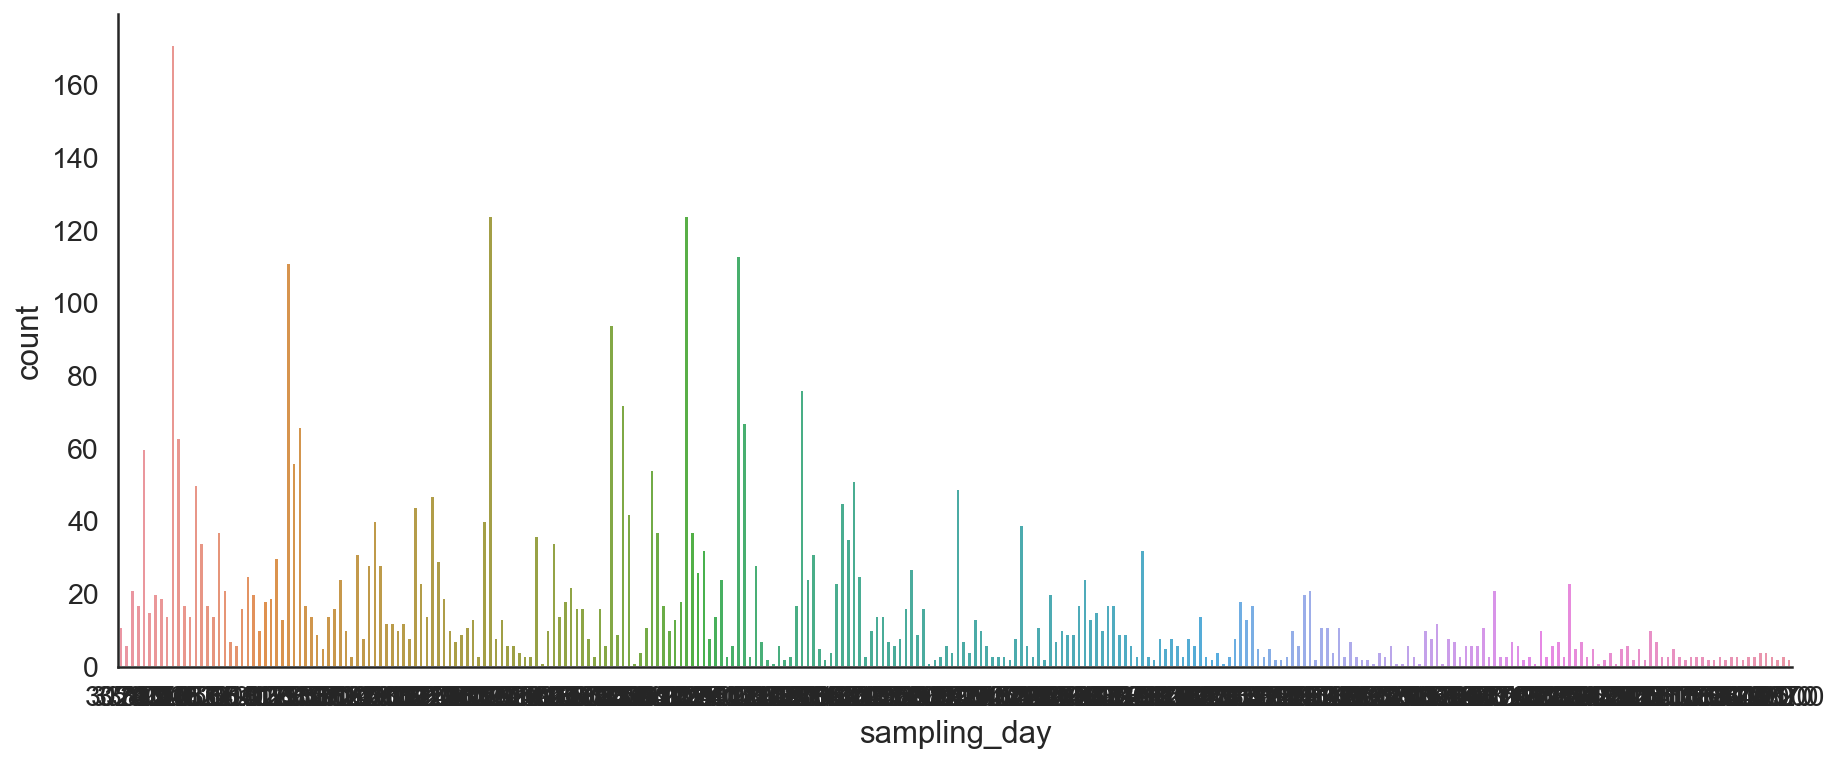

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(mov_data.query('is_gbe').sampling_day.astype(str))

In [ ]:
_df.query('sampling_day<0')

,max_level_no_distractor_1,max_level_no_distractor_2,max_level_encoding_distractor,max_level_delayed_distractor,participant,session_number,is_initial,is_baseline,time_since_last_gbe,sampling_day,trigger_date,initial_sampling_day,time_since_baseline
gbe_index,,,,,,,,,,,,,
m010_001,10,10,10,9,m010,1,True,True,0.0,-4.0,2020-06-10 14:01:21,-4.0,0.0
m010_002,10,9,10,9,m010,2,True,True,0.0,-4.0,2020-06-10 14:01:21,-4.0,0.0
m064_001,9,6,8,6,m064,1,True,True,0.0,-5.0,2020-03-10 13:15:53,-5.0,0.0
m064_002,6,7,8,5,m064,2,True,True,0.0,-5.0,2020-03-10 13:15:53,-5.0,0.0
m111_001,8,9,9,8,m111,1,True,True,0.0,-5.0,2020-12-08 19:52:43,-5.0,0.0
m111_002,9,9,9,9,m111,2,True,True,0.0,-5.0,2020-12-08 19:52:43,-5.0,0.0
m163_001,9,8,7,5,m163,1,True,True,0.0,-6.0,2021-03-08 18:09:16,-6.0,0.0
m163_002,10,10,7,9,m163,2,True,True,0.0,-6.0,2021-03-08 18:09:16,-6.0,0.0
m182_001,10,9,10,9,m182,1,True,True,0.0,-5.0,2021-05-04 17:11:01,-5.0,0.0


In [ ]:
import numpy as np
week = 1
sampling_day = 22
_df['ema_session'] = np.nan
for i in range(13):
    sampling_start = sampling_day -14
    sampling_end = sampling_day + 14
    _df.loc[((_df.sampling_day>=sampling_start) & (_df.sampling_day<sampling_end)), 'ema_session'] = week
    print(sampling_start, sampling_end)
    sampling_day += 28
    week += 1
display(_df.ema_session.value_counts())
_df.query("is_baseline==False").ema_session.isna().value_counts()   

8 36
36 64
64 92
92 120
120 148
148 176
176 204
204 232
232 260
260 288
288 316
316 344
344 372


1.0     308
2.0     272
3.0     214
4.0     176
5.0     160
7.0     145
6.0     143
8.0     106
9.0      91
10.0     74
11.0     50
12.0     36
13.0     21
Name: ema_session, dtype: int64

False    1783
True       80
Name: ema_session, dtype: int64

False    1017
True      846
Name: ema_session, dtype: int64

In [ ]:
_df.ema_session.value_counts()

1.0     185
2.0     176
3.0     130
4.0     100
5.0      82
6.0      68
7.0      65
8.0      50
9.0      48
10.0     40
11.0     34
12.0     23
13.0     16
Name: ema_session, dtype: int64

In [ ]:
len(_df.query('sampling_day<22').participant.unique())

275

In [ ]:
len(_df.query('22<sampling_day<50').participant.unique())

155

In [ ]:
len(_df.query('50<sampling_day<78').participant.unique())

171

In [ ]:
len(_df.query('78<sampling_day<106').participant.unique())

141

In [ ]:
len(_df.query('106<sampling_day<134').participant.unique())

134

In [ ]:
22-28, 50-56, 78-84

<AxesSubplot:>

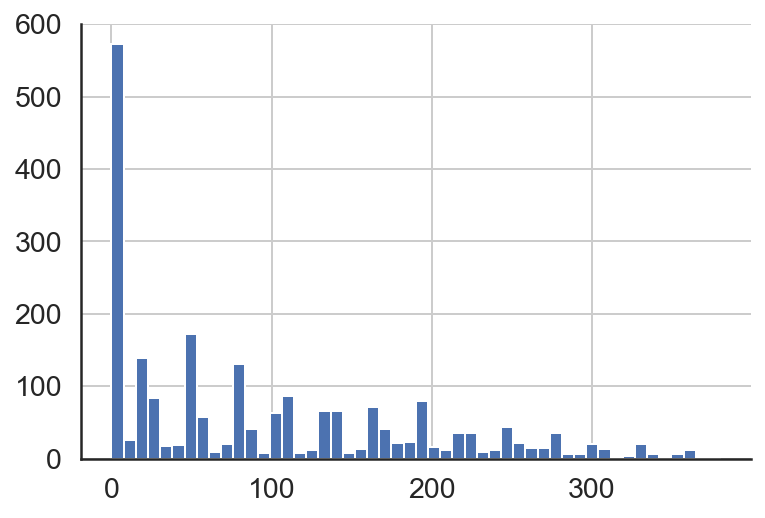

In [ ]:
_df.time_since_baseline.hist(bins = 50)

In [ ]:
_df[_df.is_baseline].sampling_day.value_counts().sort_values()

 14.0      1
 6.0       1
 16.0      1
 10.0      2
 11.0      2
 5.0       2
-4.0       2
 7.0       2
-6.0       2
 8.0       3
 9.0       4
-5.0       6
 4.0      11
 3.0      15
 2.0      20
 1.0     430
Name: sampling_day, dtype: int64

In [ ]:
initial_sampling_days.name

'sampling_day'

<AxesSubplot:>

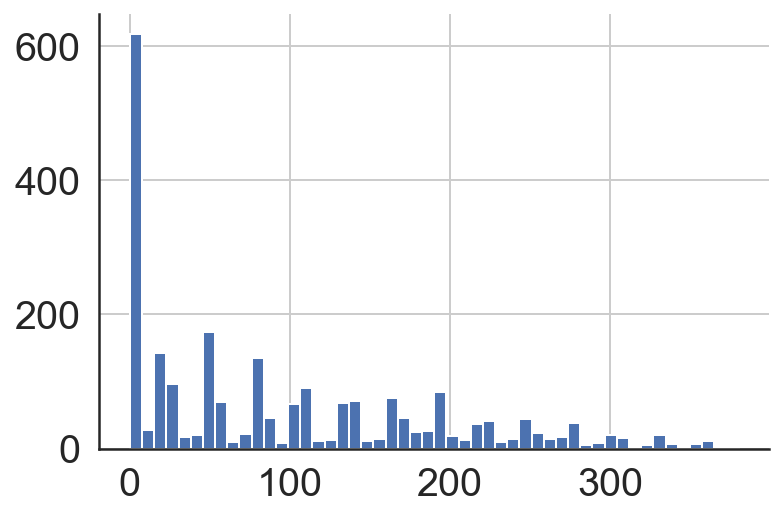

In [ ]:
_df.time_since_baseline.hist(bins = 50)

<AxesSubplot:>

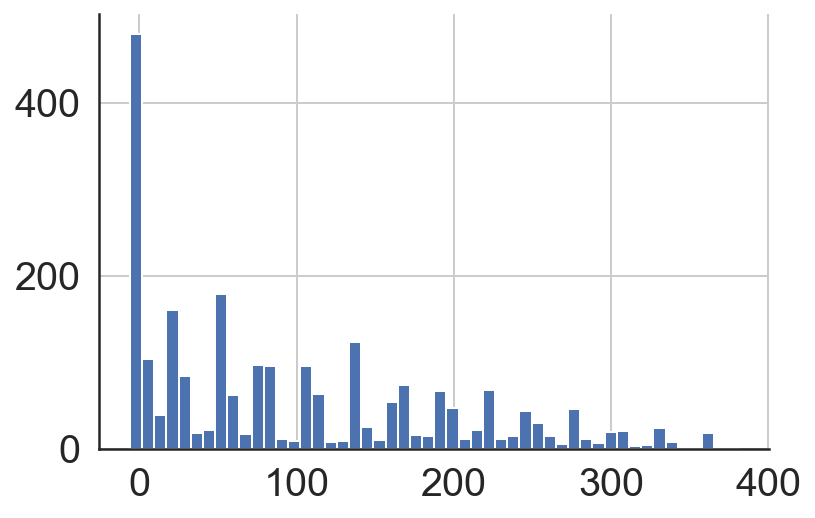

In [ ]:
_df.sampling_day.hist(bins = 50)

In [ ]:
_df['time_since_baseline'] = _df.sampling_day - _df.initial_sampling_day
_df['months_since_baseline'] = ((_df[~_df.time_since_baseline.isna()].time_since_baseline)/30).astype(int)
_df.months_since_baseline.value_counts()

0.0     879
1.0     284
2.0     209
3.0     183
4.0     162
5.0     155
6.0     140
7.0     105
8.0      89
9.0      67
10.0     51
11.0     34
12.0      5
Name: months_since_baseline, dtype: int64

<AxesSubplot:>

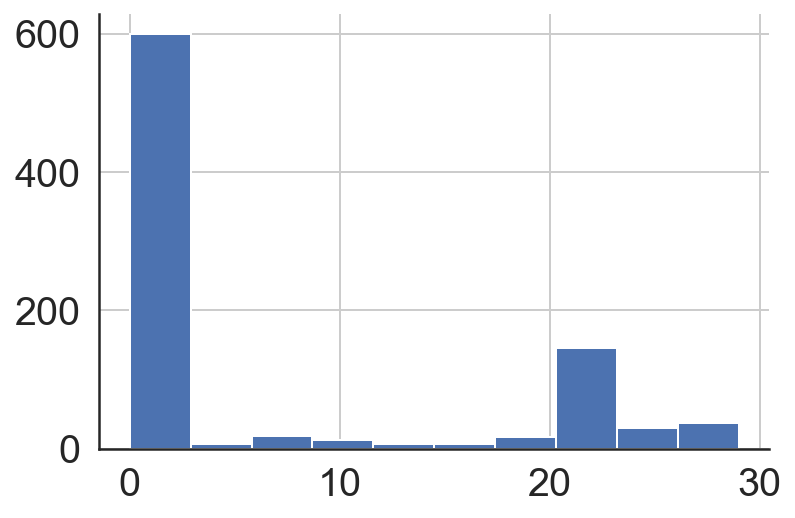

In [ ]:
_df.query('months_since_baseline==0').time_since_baseline.hist()

In [ ]:
def var_comp_plot(title, results):
    perc_variance = []
    for r in results.items():
        variances = r[1]['iccs'][1].T
        variances.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(variances[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    ax = df.plot(kind = 'bar', stacked = True)
    ax.grid(False)
    sns.despine()
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)

def test_effect_of_time(dp, score_function, variables, session_filter, other_filters = []):
    _df = dp.get_wm_data()
    # Adding data from redcap
    _df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline','time_since_last_gbe']), left_on = 'gbe_index', right_index = True, how = 'left')
    _df = _df.query("is_initial")
# Getting first and third session (if within 14 to 45 days after first session).
    _df = _df.query(session_filter)
    for filt in other_filters:
        _df = filt(_df)
    _df, _ms = score_function(_df)
    _df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
    iccs = {}
    for var in variables:
        iccs[var] = stats.analyze_reliability(_df, dependent = var, silent = True)
    return iccs

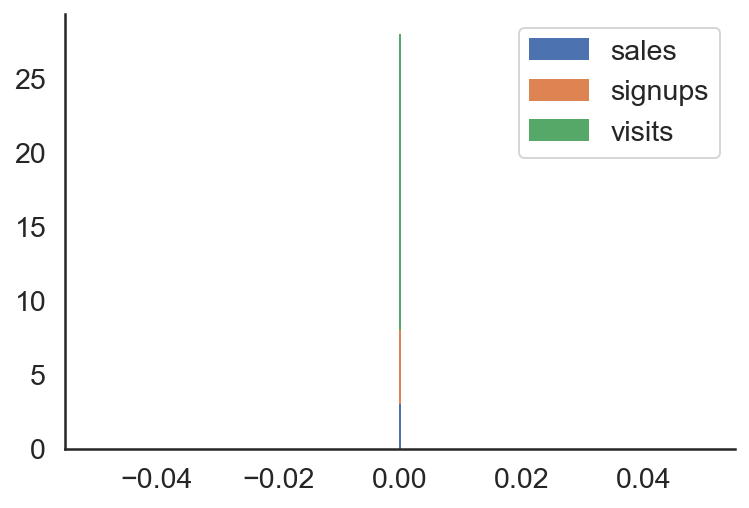

In [ ]:
df = pd.DataFrame({

    'sales': [3],

    'signups': [5],

    'visits': [20],

})

ax = df.plot.area()

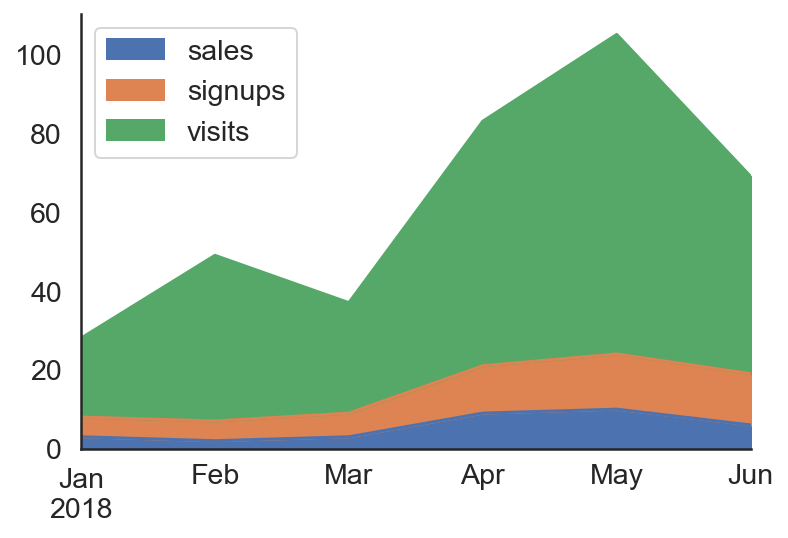

In [ ]:
df = pd.DataFrame({

    'sales': [3, 2, 3, 9, 10, 6],

    'signups': [5, 5, 6, 12, 14, 13],

    'visits': [20, 42, 28, 62, 81, 50],

}, index=pd.date_range(start='2018/01/01', end='2018/07/01',

                       freq='M'))

ax = df.plot.area()

In [ ]:
def time_analysis(title, session_filter):
    types = ['perc_predicted_sep_trial_no_distractor_1',
                           'perc_predicted_sep_trial_no_distractor_2',
                           'perc_predicted_sep_trial_encoding_distractor',
                           'perc_predicted_sep_trial_delayed_distractor']
    iccs = test_effect_of_time(dp,
                           wm_scoring.get_perc_correct_predicted_sep_trial,
                           types,
                           session_filter,
                           other_filters = [dp.filter_old_app_sessions, dp.filter_level_two_failures])

    var_comp_plot(title,{"No 1":iccs['perc_predicted_sep_trial_no_distractor_1'],
                       "No 2":iccs['perc_predicted_sep_trial_no_distractor_2'],
                       "Encoding":iccs['perc_predicted_sep_trial_encoding_distractor'],
                       "Delayed distract":iccs['perc_predicted_sep_trial_delayed_distractor']})
    print("ICC_2s:")
    for outcome in iccs.keys():
        print("%s: %.2f"%('_'.join(outcome.split('_')[4:]), iccs[outcome]['iccs'][0].loc['Single_random_raters'].ICC))


In [ ]:
for i in range(5):
    

9 participants used an old version of the task in some of their sessions.  18 sessions (3.07%) were removed from the dataset.
7 sessions (1.23%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.58
no_distractor_2: 0.65
encoding_distractor: 0.51
delayed_distractor: 0.63


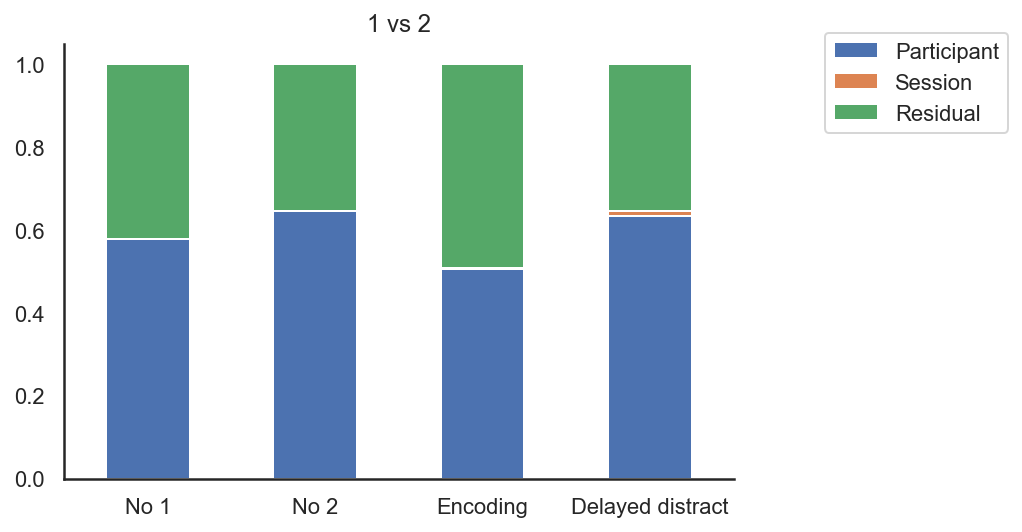

In [ ]:
iccs = time_analysis("1 vs 2", "(session_number == 1) or (session_number == 2)")

9 participants used an old version of the task in some of their sessions.  9 sessions (1.85%) were removed from the dataset.
4 sessions (0.84%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.54
no_distractor_2: 0.58
encoding_distractor: 0.46
delayed_distractor: 0.74


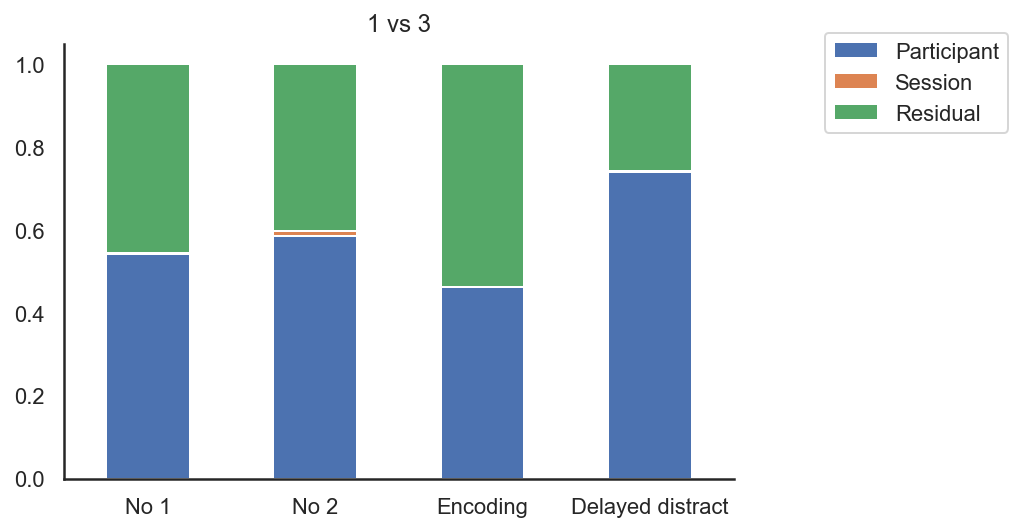

In [ ]:
iccs = time_analysis("1 vs 3", "(session_number == 1) or ((session_number == 3) and (time_since_last_gbe > 14) and (time_since_last_gbe < 45))")

9 participants used an old version of the task in some of their sessions.  12 sessions (2.63%) were removed from the dataset.
2 sessions (0.45%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.69
no_distractor_2: 0.64
encoding_distractor: 0.52
delayed_distractor: 0.67


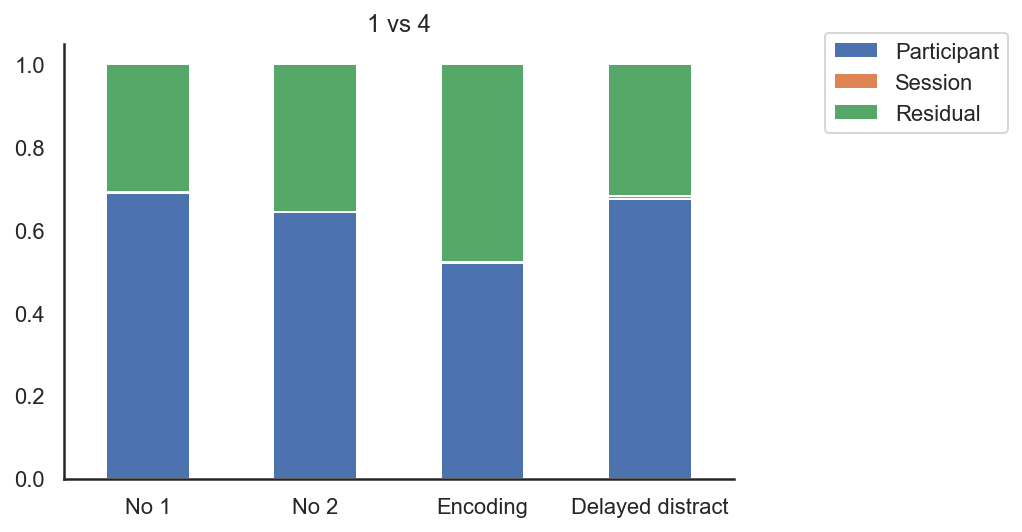

In [ ]:
iccs = time_analysis("1 vs 4", "(session_number == 1) or ((session_number == 4) and (time_since_last_gbe > 14) and (time_since_last_gbe < 45))")

9 participants used an old version of the task in some of their sessions.  9 sessions (2.12%) were removed from the dataset.
2 sessions (0.48%) were removed because participants failed a level two trial.


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



ICC_2s:
no_distractor_1: 0.68
no_distractor_2: 0.69
encoding_distractor: 0.55
delayed_distractor: 0.65


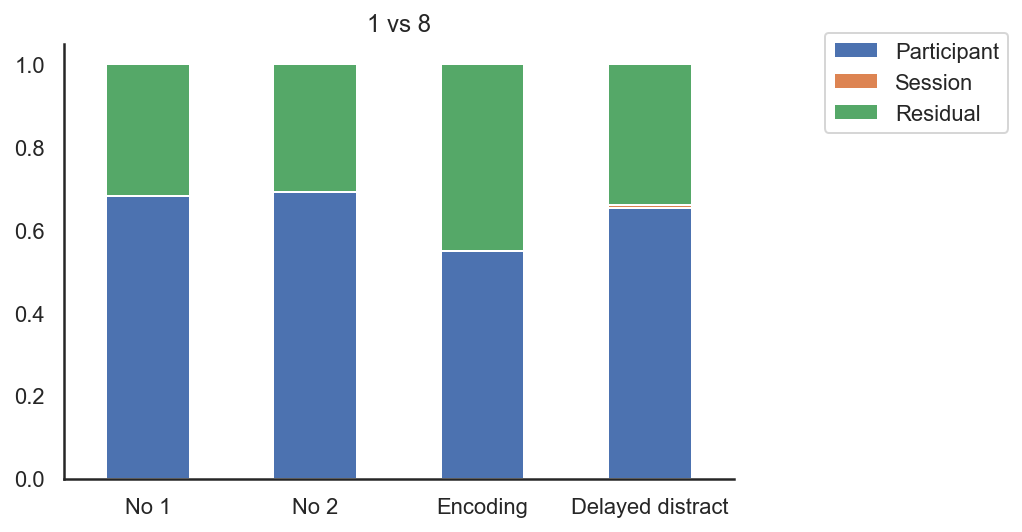

In [ ]:
iccs = time_analysis("1 vs 8", "(session_number == 1) or ((session_number == 8) and (time_since_last_gbe > 14) and (time_since_last_gbe < 45))")